<a href="https://colab.research.google.com/github/l0chaves/SEA-UN-Movilidad/blob/main/Desc2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libreria y Carga de datos

In [ ]:
#Importar librerías
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from shapely.geometry import LineString
import unicodedata

In [87]:

# Estilo de visualización
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

#Leer el archivo Excel desde la ruta completa (según Colab)
df = pd.read_excel('Datos_Originales/Base_datos_procesada_EODH/XLSX/d. Modulo viajes.xlsx', sheet_name='VIAJES')

#Mostrar columnas y primeras filas
print("Columnas disponibles:")
print(df.columns.tolist())
df.head()



Columnas disponibles:
['cod_hg', 'nom_mun_hg', 'cod_upl_hg', 'cod_utam_hg', 'zat_hg', 'estra_hg', 'cod_pers', 'cod_vj', 'orden_vj', 'otro_vj', 'zat_ori', 'utam_ori', 'upl_ori', 'localidad_ori', 'nom_mun_ori', 'zat_des', 'utam_des', 'upl_des', 'localidad_des', 'nom_mun_des', 'hora_ini', 'hora_fin', 'duracion_min', 't_acceso_min', 't_espera_min', 't_egreso_min', 'modo_principal_agrupado', 'modo_principal_desagrupado', 'motivo_viaje', 'motivo_viaje_cuidado', 'frecuencia_viaje', 'etapas', 'app_antes_vj', 'app_durante_vj', 'edad', 'sexo', 'genero', 'orien_sexual', 'identidad_etnica', 'madre_cab_familia', 'max_nivel_edu', 'ocupacion_principal', 'key_hg', 'key_pers', 'key_pers_viaja', 'key_viaje', 'fexp_vj']


cod_hg nom_mun_hg  cod_upl_hg cod_utam_hg  zat_hg estra_hg  cod_pers  \
0       1     Bogotá          31     UTAM043     374        3     13967   
1       1     Bogotá          31     UTAM043     374        3     13967   
2       1     Bogotá          31     UTAM043     374        3     13968   
3       1     Bogotá          31     UTAM043     374        3     13968   
4       1     Bogotá          31     UTAM043     374        3     13968   

   cod_vj  orden_vj otro_vj  ...  orien_sexual identidad_etnica  \
0       1         1      Sí  ...  Heterosexual          Ninguno   
1       2         2      No  ...  Heterosexual          Ninguno   
2       3         1      Sí  ...  Heterosexual          Ninguno   
3       4         2      Sí  ...  Heterosexual          Ninguno   
4       5         3      Sí  ...  Heterosexual          Ninguno   

  madre_cab_familia                 max_nivel_edu  \
0         No aplica           Secundaria completa   
1         No aplica           Secundaria completa   
2                Sí  Técnico/Tecnológico completa   
3                Sí  Técnico/Tecnológico completa   
4                Sí  Técnico/Tecnológico completa   

               ocupacion_principal                                     key_hg  \
0                 Empleado público  uuid:0001256a-c2fc-4816-91c7-ab0348c4e74b   
1                 Empleado público  uuid:0001256a-c2fc-4816-91c7-ab0348c4e74b   
2   Empleado de empresa particular  uuid:0001256a-c2fc-4816-91c7-ab0348c4e74b   
3   Empleado de empresa particular  uuid:0001256a-c2fc-4816-91c7-ab0348c4e74b   
4   Empleado de empresa particular  uuid:0001256a-c2fc-4816-91c7-ab0348c4e74b   

                                            key_pers  \
0  uuid:0001256a-c2fc-4816-91c7-ab0348c4e74b/acce...   
1  uuid:0001256a-c2fc-4816-91c7-ab0348c4e74b/acce...   
2  uuid:0001256a-c2fc-4816-91c7-ab0348c4e74b/acce...   
3  uuid:0001256a-c2fc-4816-91c7-ab0348c4e74b/acce...   
4  uuid:0001256a-c2fc-4816-91c7-ab0348c4e74b/acce...   

                                      key_pers_viaja  \
0  uuid:0001256a-c2fc-4816-91c7-ab0348c4e74b/acce...   
1  uuid:0001256a-c2fc-4816-91c7-ab0348c4e74b/acce...   
2  uuid:0001256a-c2fc-4816-91c7-ab0348c4e74b/acce...   
3  uuid:0001256a-c2fc-4816-91c7-ab0348c4e74b/acce...   
4  uuid:0001256a-c2fc-4816-91c7-ab0348c4e74b/acce...   

                                           key_viaje     fexp_vj  
0  uuid:0001256a-c2fc-4816-91c7-ab0348c4e74b/acce...  274.883425  
1  uuid:0001256a-c2fc-4816-91c7-ab0348c4e74b/acce...  274.883425  
2  uuid:0001256a-c2fc-4816-91c7-ab0348c4e74b/acce...  274.883425  
3  uuid:0001256a-c2fc-4816-91c7-ab0348c4e74b/acce...  274.883425  
4  uuid:0001256a-c2fc-4816-91c7-ab0348c4e74b/acce...  274.883425  

[5 rows x 47 columns]

In [ ]:
# Cargar el shp por localidad 
import geopandas as gpd

# Cargar shapefile directamente desde el ZIP
gdf_localidades = gpd.read_file("Datos_Originales/loca.zip")

gdf_localidades = gdf_localidades.rename(columns={'LocNombre': 'localidad'})

localidades_ori = gdf_localidades.rename(columns={'localidad': 'localidad_ori'})
localidades_des = gdf_localidades.rename(columns={'localidad': 'localidad_des'})

# Verifica las columnas
print(localidades_ori.head(3))
print(localidades_des.head(3))


# Modo de viaje principal

Estadísticas de 'modo_principal_agrupado':
                         Frecuencia  Porcentaje
modo_principal_agrupado                        
TRANSPORTE PÚBLICO            29407   29.355921
A PIE > 15 MIN                24932   24.888694
AUTO                          12586   12.564138
A PIE <15 MIN                 12392   12.370475
MOTO                           6247    6.236149
BICICLETA                      6104    6.093397
TAXI OCUPADO                   3267    3.261325
TRANSPORTE ESCOLAR             2058    2.054425
ESPECIAL OCUPADO               1982    1.978557
INFORMAL                        867    0.865494
OTRO                            332    0.331423


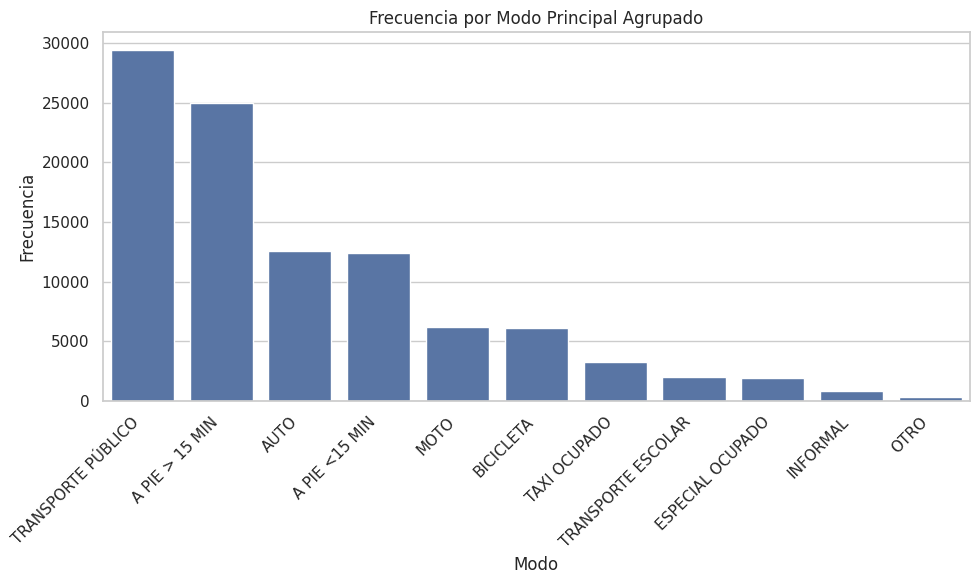

In [41]:
# Estadística descriptiva
modo_stats = df['modo_principal_agrupado'].value_counts(dropna=False).to_frame(name='Frecuencia')
modo_stats['Porcentaje'] = (modo_stats['Frecuencia'] / modo_stats['Frecuencia'].sum()) * 100

# Mostrar resultados
print("Estadísticas de 'modo_principal_agrupado':")
print(modo_stats)

# Visualización
sns.barplot(x=modo_stats.index, y='Frecuencia', data=modo_stats)
plt.xticks(rotation=45, ha='right')
plt.title("Frecuencia por Modo Principal Agrupado")
plt.ylabel("Frecuencia")
plt.xlabel("Modo")
plt.tight_layout()
plt.show()


## En mapa por localidad

In [58]:
import unicodedata

#En mapa
od_modo = df.groupby(['localidad_ori', 'localidad_des', 'modo_principal_agrupado']).agg(
    Frecuencia=('key_viaje', 'count')
).reset_index()

# Normaliza los nombres antes del merge, quitando tildes y pasando a mayúsculas
def quitar_tildes(texto):
    if pd.isnull(texto):
        return texto
    return ''.join(
        c for c in unicodedata.normalize('NFKD', str(texto))
        if not unicodedata.combining(c)
    )

od_modo['localidad_ori'] = od_modo['localidad_ori'].apply(quitar_tildes).str.strip().str.upper()
localidades_ori['localidad_ori'] = localidades_ori['localidad_ori'].apply(quitar_tildes).str.strip().str.upper()

od_modo['localidad_des'] = od_modo['localidad_des'].apply(quitar_tildes).str.strip().str.upper()
localidades_des['localidad_des'] = localidades_des['localidad_des'].apply(quitar_tildes).str.strip().str.upper()

# Repite el merge después de normalizar
od_modo = od_modo.merge(localidades_ori[['localidad_ori', 'geometry']], on='localidad_ori', how='left')
od_modo = od_modo.rename(columns={'geometry': 'geometry_ori'})

od_modo = od_modo.merge(localidades_des[['localidad_des', 'geometry']], on='localidad_des', how='left')
od_modo = od_modo.rename(columns={'geometry': 'geometry_des'})

# Ahora geometry_ori debería tener valores válidos
od_modo = od_modo.dropna(subset=['geometry_ori', 'geometry_des'])
od_modo

localidad_ori   localidad_des modo_principal_agrupado  Frecuencia  \
0     ANTONIO NARINO  ANTONIO NARINO           A PIE <15 MIN         176   
1     ANTONIO NARINO  ANTONIO NARINO          A PIE > 15 MIN         204   
2     ANTONIO NARINO  ANTONIO NARINO                    AUTO          14   
3     ANTONIO NARINO  ANTONIO NARINO               BICICLETA          20   
4     ANTONIO NARINO  ANTONIO NARINO                INFORMAL           2   
...              ...             ...                     ...         ...   
3374            USME            USME                    MOTO          32   
3375            USME            USME                    OTRO          11   
3376            USME            USME            TAXI OCUPADO          17   
3377            USME            USME      TRANSPORTE ESCOLAR          31   
3378            USME            USME      TRANSPORTE PÚBLICO         379   

                                           geometry_ori  \
0     POLYGON ((-74.13075 4.59335, -74.12917 4.59327...   
1     POLYGON ((-74.13075 4.59335, -74.12917 4.59327...   
2     POLYGON ((-74.13075 4.59335, -74.12917 4.59327...   
3     POLYGON ((-74.13075 4.59335, -74.12917 4.59327...   
4     POLYGON ((-74.13075 4.59335, -74.12917 4.59327...   
...                                                 ...   
3374  POLYGON ((-74.05597 4.50832, -74.05611 4.50822...   
3375  POLYGON ((-74.05597 4.50832, -74.05611 4.50822...   
3376  POLYGON ((-74.05597 4.50832, -74.05611 4.50822...   
3377  POLYGON ((-74.05597 4.50832, -74.05611 4.50822...   
3378  POLYGON ((-74.05597 4.50832, -74.05611 4.50822...   

                                           geometry_des  
0     POLYGON ((-74.13075 4.59335, -74.12917 4.59327...  
1     POLYGON ((-74.13075 4.59335, -74.12917 4.59327...  
2     POLYGON ((-74.13075 4.59335, -74.12917 4.59327...  
3     POLYGON ((-74.13075 4.59335, -74.12917 4.59327...  
4     POLYGON ((-74.13075 4.59335, -74.12917 4.59327...  
...                                                 ...  
3374  POLYGON ((-74.05597 4.50832, -74.05611 4.50822...  
3375  POLYGON ((-74.05597 4.50832, -74.05611 4.50822...  
3376  POLYGON ((-74.05597 4.50832, -74.05611 4.50822...  
3377  POLYGON ((-74.05597 4.50832, -74.05611 4.50822...  
3378  POLYGON ((-74.05597 4.50832, -74.05611 4.50822...  

[3020 rows x 6 columns]

In [59]:
# Crear líneas de flujo
od_modo['geometry'] = od_modo.apply(
    lambda row: LineString([
        row['geometry_ori'].centroid.coords[0],
        row['geometry_des'].centroid.coords[0]
    ]),
    axis=1
)

# Convertir a GeoDataFrame
gdf_flujos = gpd.GeoDataFrame(od_modo, geometry='geometry', crs=gdf_localidades.crs)
gdf_flujos



localidad_ori   localidad_des modo_principal_agrupado  Frecuencia  \
0     ANTONIO NARINO  ANTONIO NARINO           A PIE <15 MIN         176   
1     ANTONIO NARINO  ANTONIO NARINO          A PIE > 15 MIN         204   
2     ANTONIO NARINO  ANTONIO NARINO                    AUTO          14   
3     ANTONIO NARINO  ANTONIO NARINO               BICICLETA          20   
4     ANTONIO NARINO  ANTONIO NARINO                INFORMAL           2   
...              ...             ...                     ...         ...   
3374            USME            USME                    MOTO          32   
3375            USME            USME                    OTRO          11   
3376            USME            USME            TAXI OCUPADO          17   
3377            USME            USME      TRANSPORTE ESCOLAR          31   
3378            USME            USME      TRANSPORTE PÚBLICO         379   

                                           geometry_ori  \
0     POLYGON ((-74.13075 4.59335, -74.12917 4.59327...   
1     POLYGON ((-74.13075 4.59335, -74.12917 4.59327...   
2     POLYGON ((-74.13075 4.59335, -74.12917 4.59327...   
3     POLYGON ((-74.13075 4.59335, -74.12917 4.59327...   
4     POLYGON ((-74.13075 4.59335, -74.12917 4.59327...   
...                                                 ...   
3374  POLYGON ((-74.05597 4.50832, -74.05611 4.50822...   
3375  POLYGON ((-74.05597 4.50832, -74.05611 4.50822...   
3376  POLYGON ((-74.05597 4.50832, -74.05611 4.50822...   
3377  POLYGON ((-74.05597 4.50832, -74.05611 4.50822...   
3378  POLYGON ((-74.05597 4.50832, -74.05611 4.50822...   

                                           geometry_des  \
0     POLYGON ((-74.13075 4.59335, -74.12917 4.59327...   
1     POLYGON ((-74.13075 4.59335, -74.12917 4.59327...   
2     POLYGON ((-74.13075 4.59335, -74.12917 4.59327...   
3     POLYGON ((-74.13075 4.59335, -74.12917 4.59327...   
4     POLYGON ((-74.13075 4.59335, -74.12917 4.59327...   
...                                                 ...   
3374  POLYGON ((-74.05597 4.50832, -74.05611 4.50822...   
3375  POLYGON ((-74.05597 4.50832, -74.05611 4.50822...   
3376  POLYGON ((-74.05597 4.50832, -74.05611 4.50822...   
3377  POLYGON ((-74.05597 4.50832, -74.05611 4.50822...   
3378  POLYGON ((-74.05597 4.50832, -74.05611 4.50822...   

                                               geometry  
0     LINESTRING (-74.10284 4.58877, -74.10284 4.58877)  
1     LINESTRING (-74.10284 4.58877, -74.10284 4.58877)  
2     LINESTRING (-74.10284 4.58877, -74.10284 4.58877)  
3     LINESTRING (-74.10284 4.58877, -74.10284 4.58877)  
4     LINESTRING (-74.10284 4.58877, -74.10284 4.58877)  
...                                                 ...  
3374  LINESTRING (-74.14281 4.39003, -74.14281 4.39003)  
3375  LINESTRING (-74.14281 4.39003, -74.14281 4.39003)  
3376  LINESTRING (-74.14281 4.39003, -74.14281 4.39003)  
3377  LINESTRING (-74.14281 4.39003, -74.14281 4.39003)  
3378  LINESTRING (-74.14281 4.39003, -74.14281 4.39003)  

[3020 rows x 7 columns]

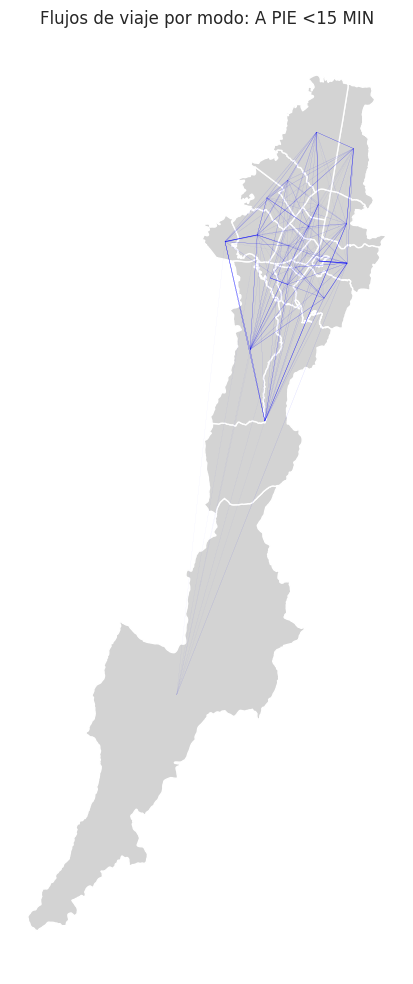

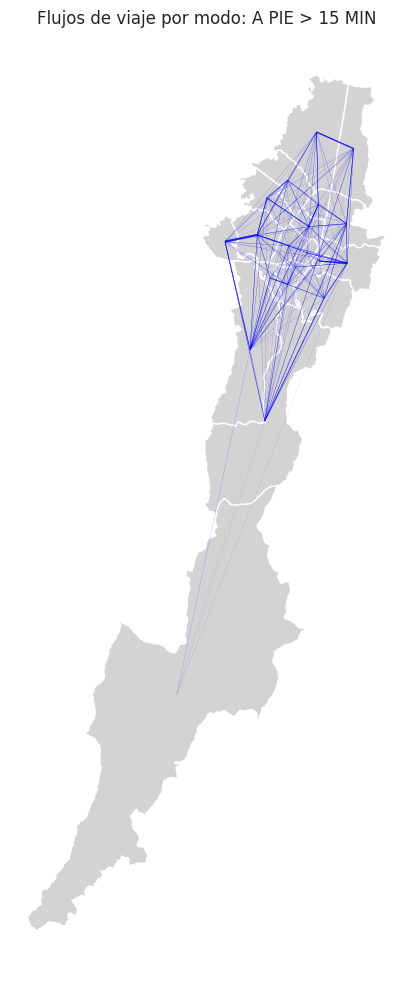

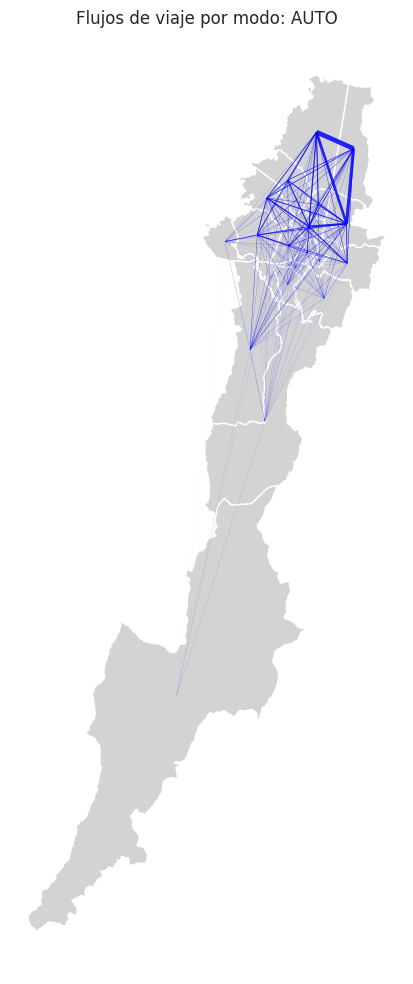

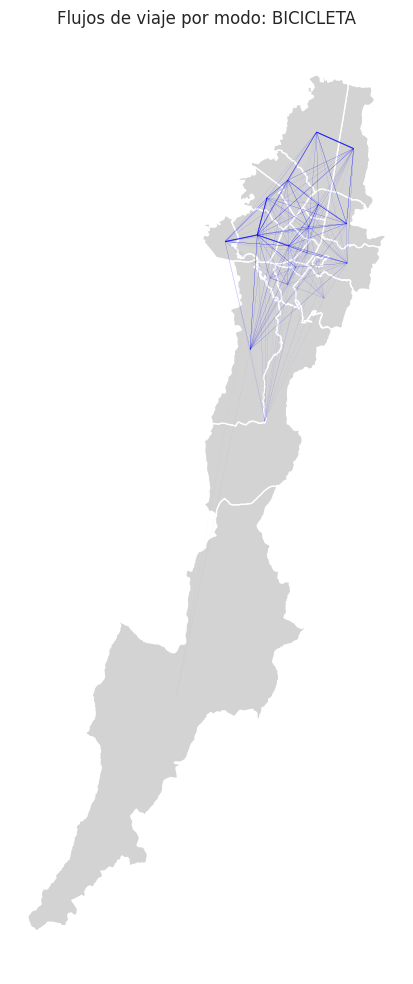

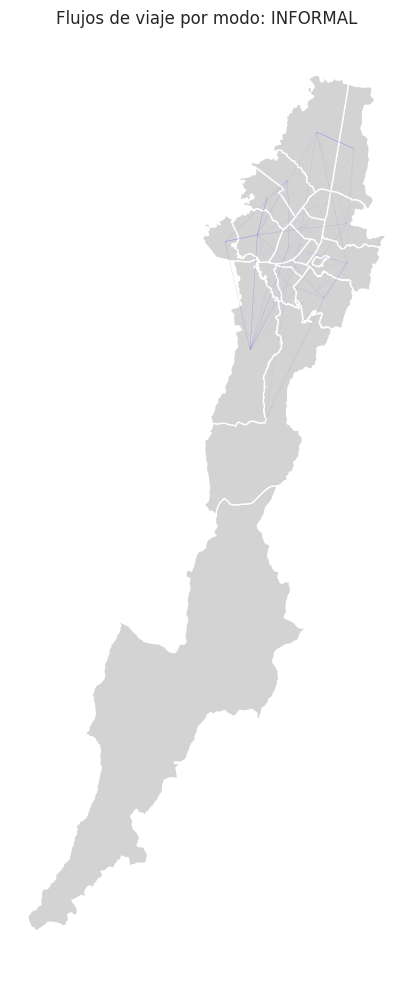

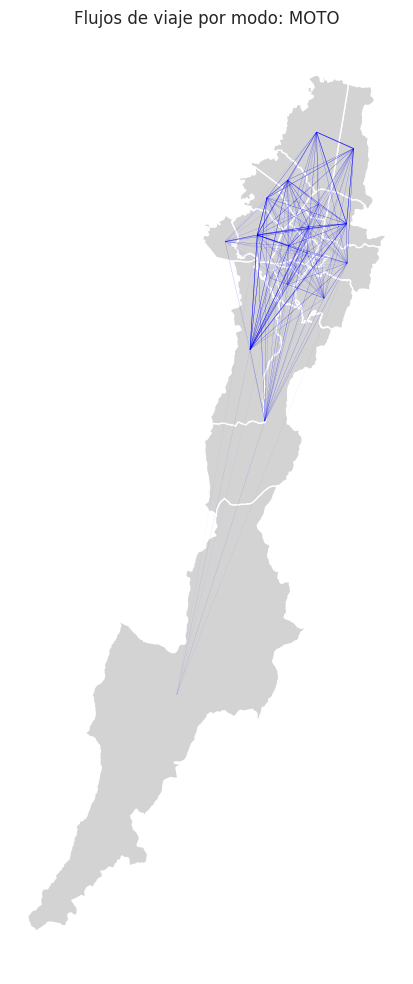

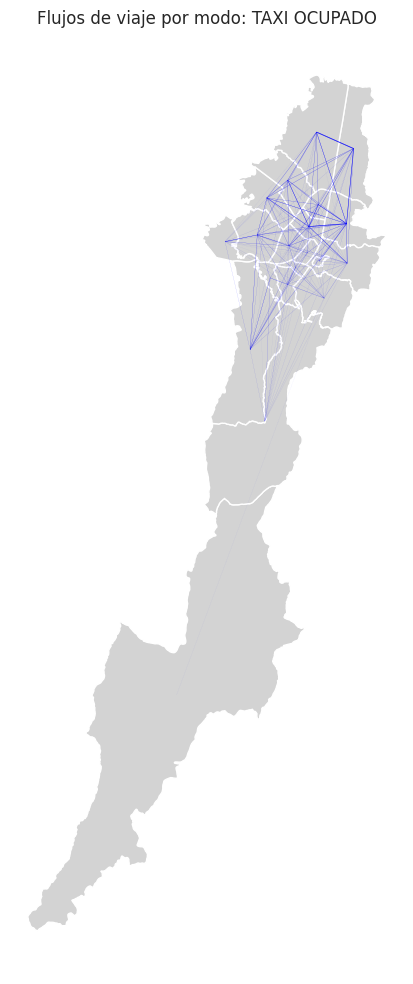

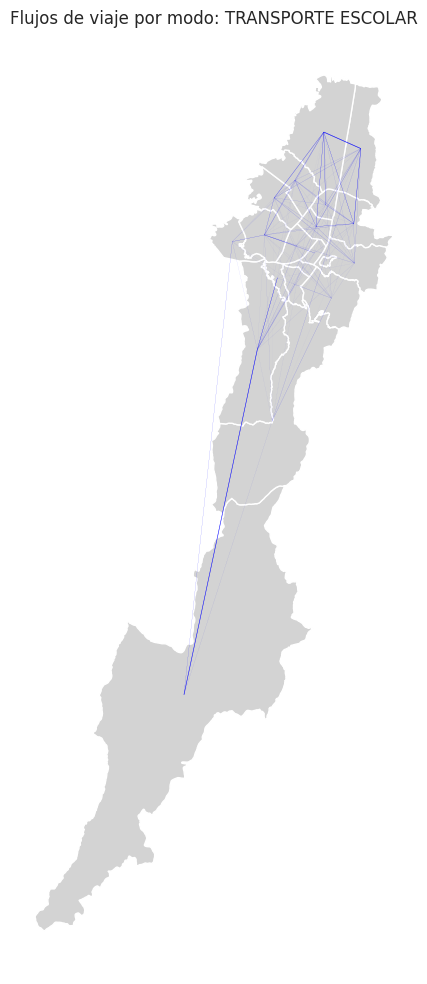

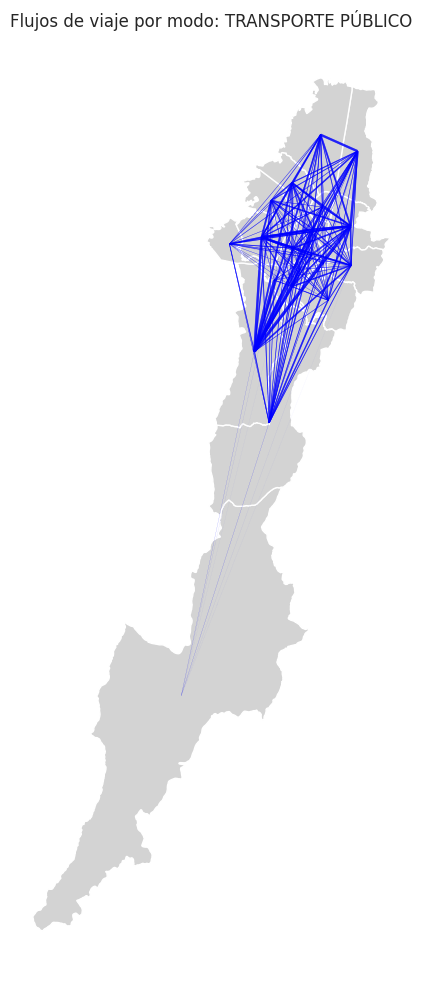

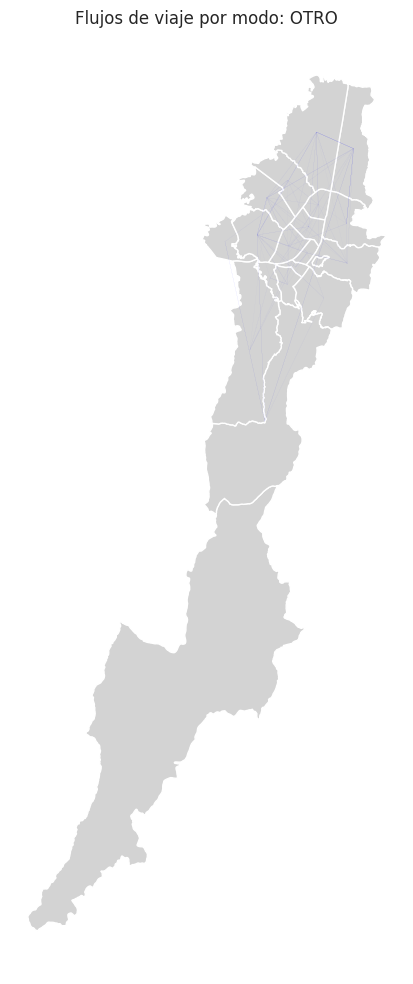

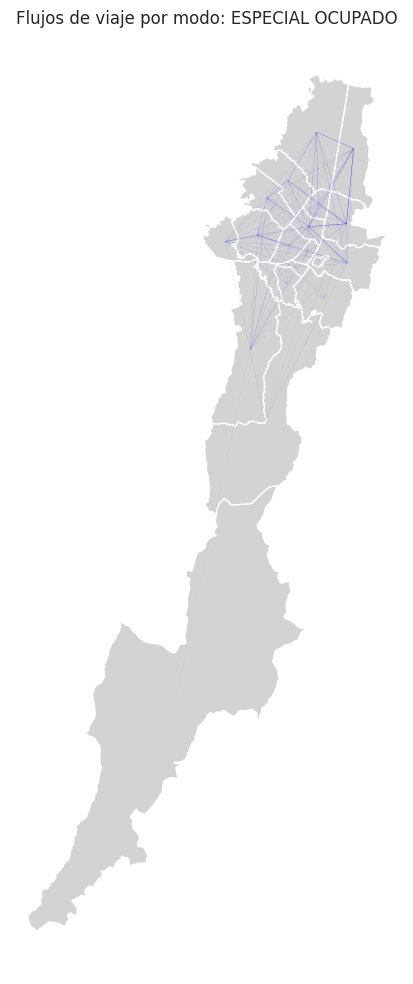

In [62]:
# Obtener lista única de modos
modos = gdf_flujos['modo_principal_agrupado'].unique()

# Graficar flujos por modo
for modo in modos:
    fig, ax = plt.subplots(figsize=(10, 10))
    gdf_localidades.plot(ax=ax, color='lightgrey', edgecolor='white')
    
    subset = gdf_flujos[gdf_flujos['modo_principal_agrupado'] == modo]
    
    subset.plot(
        ax=ax,
        linewidth=subset['Frecuencia'] / 100,  # Ajusta escala
        color='blue',
        alpha=0.6
    )
    
    plt.title(f'Flujos de viaje por modo: {modo}')
    plt.axis('off')
    plt.tight_layout()
    plt.show()

### Interactivo

In [63]:
import folium

# Crear mapa base centrado en Bogotá
m = folium.Map(location=[4.65, -74.1], zoom_start=11)

colores_modos = { od_modo['modo_principal_agrupado'].unique()[i]: color for i, color in enumerate(['green', 'red', 'orange', 'blue', 'purple', 'pink', 'blue', 'yellow', 'brown']) }
# Añadir líneas
for _, row in gdf_flujos.iterrows():
    color = colores_modos.get(row['modo_principal_agrupado'], 'gray')
    tooltip = f"{row['localidad_ori']} → {row['localidad_des']}<br>Modo: {row['modo_principal_agrupado']}<br>Viajes: {row['Frecuencia']}"
    
    folium.PolyLine(
        locations=[(row['geometry'].coords[0][1], row['geometry'].coords[0][0]),
                   (row['geometry'].coords[1][1], row['geometry'].coords[1][0])],
        color=color,
        weight=max(row['Frecuencia'] / 100, 1),
        tooltip=tooltip,
        opacity=0.7
    ).add_to(m)

# Guardar mapa
m.save('modo_interactivo.html')


# Primer modo de viaje

In [42]:
personas_por_modo = df.groupby('cod_pers')['modo_principal_agrupado'].first().value_counts().to_frame(name='Frecuencia')
personas_por_modo['Porcentaje'] = (personas_por_modo['Frecuencia'] / personas_por_modo['Frecuencia'].sum()) * 100

print("Número de personas según su primer modo de transporte registrado:")
print(personas_por_modo)


Número de personas según su primer modo de transporte registrado:
                         Frecuencia  Porcentaje
modo_principal_agrupado                        
TRANSPORTE PÚBLICO            14760   30.408537
A PIE > 15 MIN                11769   24.246482
AUTO                           5935   12.227281
A PIE <15 MIN                  5826   12.002719
MOTO                           3054    6.291848
BICICLETA                      2983    6.145574
TAXI OCUPADO                   1572    3.238633
ESPECIAL OCUPADO               1036    2.134366
TRANSPORTE ESCOLAR             1019    2.099343
INFORMAL                        422    0.869404
OTRO                            163    0.335812


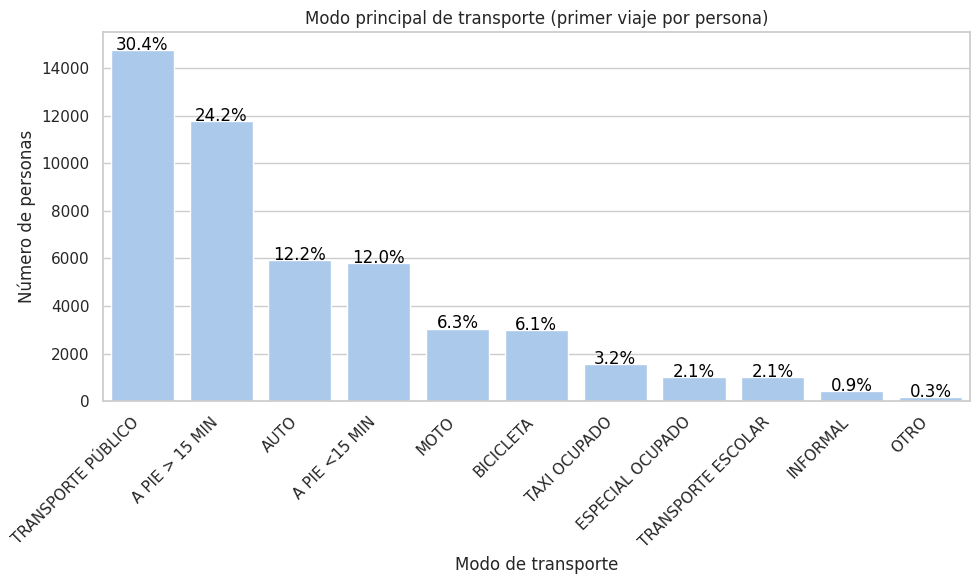

In [43]:
#: Agrupar por persona y tomar su primer modo de transporte registrado
personas_por_modo = df.groupby('cod_pers')['modo_principal_agrupado'].first().value_counts().to_frame(name='Frecuencia')
personas_por_modo['Porcentaje'] = (personas_por_modo['Frecuencia'] / personas_por_modo['Frecuencia'].sum()) * 100

# Resetear índice para graficar fácilmente
personas_por_modo = personas_por_modo.reset_index()
personas_por_modo.columns = ['Modo', 'Frecuencia', 'Porcentaje']

#  Crear gráfico bonito con Seaborn
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid", palette="pastel")
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=personas_por_modo, x='Modo', y='Frecuencia')

# Agregar porcentajes encima de las barras
for index, row in personas_por_modo.iterrows():
    ax.text(index, row.Frecuencia + 2, f"{row.Porcentaje:.1f}%", color='black', ha="center")

# Estética del gráfico
plt.title("Modo principal de transporte (primer viaje por persona)")
plt.ylabel("Número de personas")
plt.xlabel("Modo de transporte")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


/tmp/ipykernel_1211/719470640.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=modo_desag_personas, x='Modo Desagrupado', y='Frecuencia', palette='viridis')


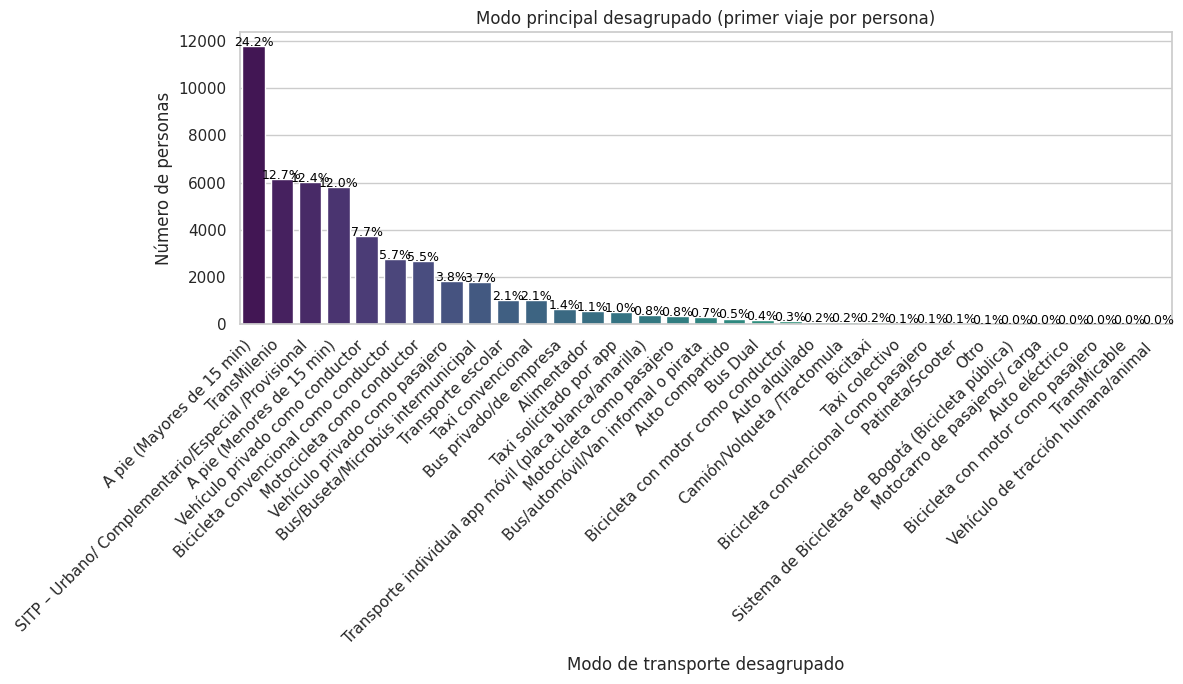

In [44]:
#  Agrupar por persona y tomar su primer modo desagrupado
modo_desag_personas = df.groupby('cod_pers')['modo_principal_desagrupado'].first().value_counts().to_frame(name='Frecuencia')
modo_desag_personas['Porcentaje'] = (modo_desag_personas['Frecuencia'] / modo_desag_personas['Frecuencia'].sum()) * 100

# Preparar para gráfico
modo_desag_personas = modo_desag_personas.reset_index()
modo_desag_personas.columns = ['Modo Desagrupado', 'Frecuencia', 'Porcentaje']
modo_desag_personas = modo_desag_personas.sort_values(by='Frecuencia', ascending=False)

# Gráfico de barras
plt.figure(figsize=(12, 7))
ax = sns.barplot(data=modo_desag_personas, x='Modo Desagrupado', y='Frecuencia', palette='viridis')

# Etiquetas de porcentaje sobre cada barra
for index, row in modo_desag_personas.iterrows():
    ax.text(index, row.Frecuencia + 2, f"{row.Porcentaje:.1f}%", color='black', ha="center", fontsize=9)

# Título y etiquetas
plt.title("Modo principal desagrupado (primer viaje por persona)")
plt.ylabel("Número de personas")
plt.xlabel("Modo de transporte desagrupado")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Motivo del viaje

/tmp/ipykernel_1211/2552362207.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=motivo_por_persona, x='Motivo del viaje', y='Frecuencia', palette='muted')


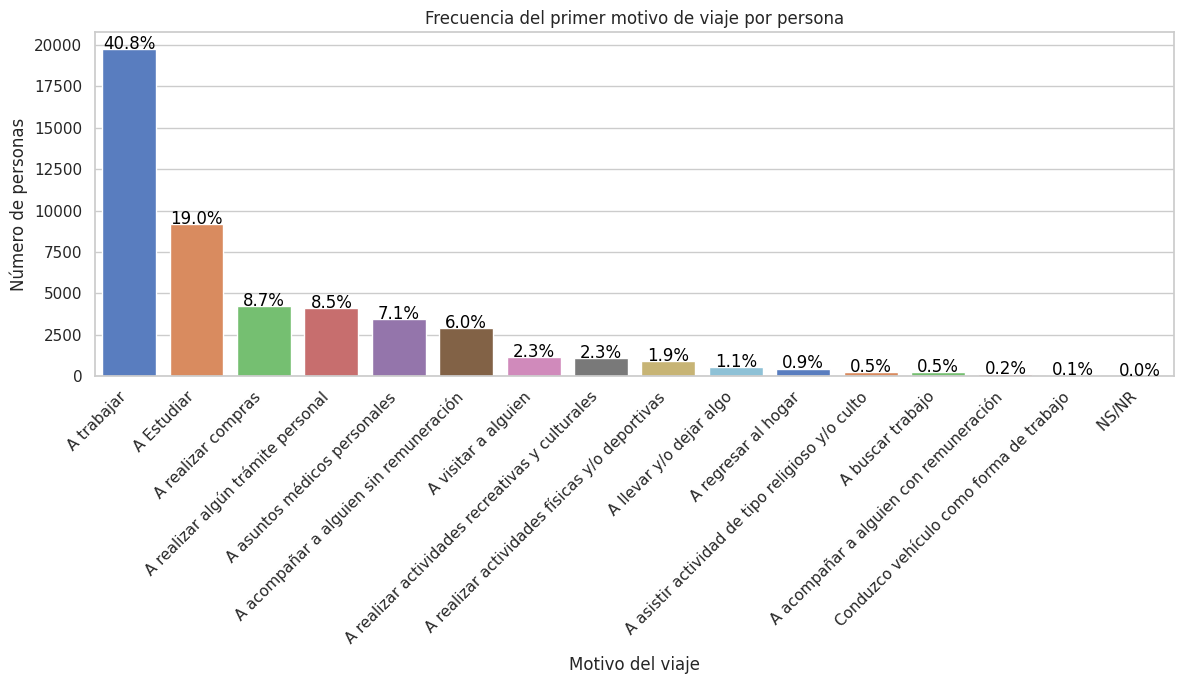

In [49]:
#  Agrupar por persona y tomar el primer motivo de viaje
motivo_por_persona = df.groupby('cod_pers')['motivo_viaje'].first().value_counts().to_frame(name='Frecuencia')
motivo_por_persona['Porcentaje'] = (motivo_por_persona['Frecuencia'] / motivo_por_persona['Frecuencia'].sum()) * 100

# Preparar para gráfico
motivo_por_persona = motivo_por_persona.reset_index()
motivo_por_persona.columns = ['Motivo del viaje', 'Frecuencia', 'Porcentaje']
motivo_por_persona = motivo_por_persona.sort_values(by='Frecuencia', ascending=False)

#  Gráfico de barras
plt.figure(figsize=(12, 7))
ax = sns.barplot(data=motivo_por_persona, x='Motivo del viaje', y='Frecuencia', palette='muted')

# Agregar etiquetas de porcentaje sobre las barras
for index, row in motivo_por_persona.iterrows():
    ax.text(index, row.Frecuencia + 2, f"{row.Porcentaje:.1f}%", ha='center', color='black')

# Estética del gráfico
plt.title("Frecuencia del primer motivo de viaje por persona")
plt.xlabel("Motivo del viaje")
plt.ylabel("Número de personas")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## En mapa

In [67]:
#En mapa
od_motivo = df.groupby(['localidad_ori', 'localidad_des', 'motivo_viaje']).agg(
    Frecuencia=('key_viaje', 'count')
).reset_index()
od_motivo

# Normaliza los nombres antes del merge, quitando tildes y pasando a mayúsculas
def quitar_tildes(texto):
    if pd.isnull(texto):
        return texto
    return ''.join(
        c for c in unicodedata.normalize('NFKD', str(texto))
        if not unicodedata.combining(c)
    )

od_motivo['localidad_ori'] = od_motivo['localidad_ori'].apply(quitar_tildes).str.strip().str.upper()
localidades_ori['localidad_ori'] = localidades_ori['localidad_ori'].apply(quitar_tildes).str.strip().str.upper()

od_motivo['localidad_des'] = od_motivo['localidad_des'].apply(quitar_tildes).str.strip().str.upper()
localidades_des['localidad_des'] = localidades_des['localidad_des'].apply(quitar_tildes).str.strip().str.upper()

# Repite el merge después de normalizar
od_motivo = od_motivo.merge(localidades_ori[['localidad_ori', 'geometry']], on='localidad_ori', how='left')
od_motivo = od_motivo.rename(columns={'geometry': 'geometry_ori'})

od_motivo = od_motivo.merge(localidades_des[['localidad_des', 'geometry']], on='localidad_des', how='left')
od_motivo = od_motivo.rename(columns={'geometry': 'geometry_des'})

# Ahora geometry_ori debería tener valores válidos
od_motivo = od_motivo.dropna(subset=['geometry_ori', 'geometry_des'])
od_motivo

localidad_ori   localidad_des  \
0     ANTONIO NARINO  ANTONIO NARINO   
1     ANTONIO NARINO  ANTONIO NARINO   
2     ANTONIO NARINO  ANTONIO NARINO   
3     ANTONIO NARINO  ANTONIO NARINO   
4     ANTONIO NARINO  ANTONIO NARINO   
...              ...             ...   
3447            USME            USME   
3448            USME            USME   
3449            USME            USME   
3450            USME            USME   
3451            USME            USME   

                                          motivo_viaje  Frecuencia  \
0                                           A Estudiar          45   
1               A acompañar a alguien con remuneración           1   
2               A acompañar a alguien sin remuneración          31   
3      A asistir actividad de tipo religioso y/o culto           1   
4                         A asuntos médicos personales          16   
...                                                ...         ...   
3447                                A realizar compras         137   
3448                               A regresar al hogar         994   
3449                                        A trabajar         189   
3450                               A visitar a alguien          39   
3451           Conduzco vehículo como forma de trabajo           1   

                                           geometry_ori  \
0     POLYGON ((-74.13075 4.59335, -74.12917 4.59327...   
1     POLYGON ((-74.13075 4.59335, -74.12917 4.59327...   
2     POLYGON ((-74.13075 4.59335, -74.12917 4.59327...   
3     POLYGON ((-74.13075 4.59335, -74.12917 4.59327...   
4     POLYGON ((-74.13075 4.59335, -74.12917 4.59327...   
...                                                 ...   
3447  POLYGON ((-74.05597 4.50832, -74.05611 4.50822...   
3448  POLYGON ((-74.05597 4.50832, -74.05611 4.50822...   
3449  POLYGON ((-74.05597 4.50832, -74.05611 4.50822...   
3450  POLYGON ((-74.05597 4.50832, -74.05611 4.50822...   
3451  POLYGON ((-74.05597 4.50832, -74.05611 4.50822...   

                                           geometry_des  
0     POLYGON ((-74.13075 4.59335, -74.12917 4.59327...  
1     POLYGON ((-74.13075 4.59335, -74.12917 4.59327...  
2     POLYGON ((-74.13075 4.59335, -74.12917 4.59327...  
3     POLYGON ((-74.13075 4.59335, -74.12917 4.59327...  
4     POLYGON ((-74.13075 4.59335, -74.12917 4.59327...  
...                                                 ...  
3447  POLYGON ((-74.05597 4.50832, -74.05611 4.50822...  
3448  POLYGON ((-74.05597 4.50832, -74.05611 4.50822...  
3449  POLYGON ((-74.05597 4.50832, -74.05611 4.50822...  
3450  POLYGON ((-74.05597 4.50832, -74.05611 4.50822...  
3451  POLYGON ((-74.05597 4.50832, -74.05611 4.50822...  

[3118 rows x 6 columns]

In [ ]:
# Crear líneas de flujo
od_motivo['geometry'] = od_motivo.apply(
    lambda row: LineString([
        row['geometry_ori'].centroid.coords[0],
        row['geometry_des'].centroid.coords[0]
    ]),
    axis=1
)

# Convertir a GeoDataFrame
gdf_flujos_motivo = gpd.GeoDataFrame(od_motivo, geometry='geometry', crs=gdf_localidades.crs)
gdf_flujos_motivo

localidad_ori   localidad_des  \
0     ANTONIO NARINO  ANTONIO NARINO   
1     ANTONIO NARINO  ANTONIO NARINO   
2     ANTONIO NARINO  ANTONIO NARINO   
3     ANTONIO NARINO  ANTONIO NARINO   
4     ANTONIO NARINO  ANTONIO NARINO   
...              ...             ...   
3447            USME            USME   
3448            USME            USME   
3449            USME            USME   
3450            USME            USME   
3451            USME            USME   

                                          motivo_viaje  Frecuencia  \
0                                           A Estudiar          45   
1               A acompañar a alguien con remuneración           1   
2               A acompañar a alguien sin remuneración          31   
3      A asistir actividad de tipo religioso y/o culto           1   
4                         A asuntos médicos personales          16   
...                                                ...         ...   
3447                                A realizar compras         137   
3448                               A regresar al hogar         994   
3449                                        A trabajar         189   
3450                               A visitar a alguien          39   
3451           Conduzco vehículo como forma de trabajo           1   

                                           geometry_ori  \
0     POLYGON ((-74.13075 4.59335, -74.12917 4.59327...   
1     POLYGON ((-74.13075 4.59335, -74.12917 4.59327...   
2     POLYGON ((-74.13075 4.59335, -74.12917 4.59327...   
3     POLYGON ((-74.13075 4.59335, -74.12917 4.59327...   
4     POLYGON ((-74.13075 4.59335, -74.12917 4.59327...   
...                                                 ...   
3447  POLYGON ((-74.05597 4.50832, -74.05611 4.50822...   
3448  POLYGON ((-74.05597 4.50832, -74.05611 4.50822...   
3449  POLYGON ((-74.05597 4.50832, -74.05611 4.50822...   
3450  POLYGON ((-74.05597 4.50832, -74.05611 4.50822...   
3451  POLYGON ((-74.05597 4.50832, -74.05611 4.50822...   

                                           geometry_des  \
0     POLYGON ((-74.13075 4.59335, -74.12917 4.59327...   
1     POLYGON ((-74.13075 4.59335, -74.12917 4.59327...   
2     POLYGON ((-74.13075 4.59335, -74.12917 4.59327...   
3     POLYGON ((-74.13075 4.59335, -74.12917 4.59327...   
4     POLYGON ((-74.13075 4.59335, -74.12917 4.59327...   
...                                                 ...   
3447  POLYGON ((-74.05597 4.50832, -74.05611 4.50822...   
3448  POLYGON ((-74.05597 4.50832, -74.05611 4.50822...   
3449  POLYGON ((-74.05597 4.50832, -74.05611 4.50822...   
3450  POLYGON ((-74.05597 4.50832, -74.05611 4.50822...   
3451  POLYGON ((-74.05597 4.50832, -74.05611 4.50822...   

                                               geometry  
0     LINESTRING (-74.10284 4.58877, -74.10284 4.58877)  
1     LINESTRING (-74.10284 4.58877, -74.10284 4.58877)  
2     LINESTRING (-74.10284 4.58877, -74.10284 4.58877)  
3     LINESTRING (-74.10284 4.58877, -74.10284 4.58877)  
4     LINESTRING (-74.10284 4.58877, -74.10284 4.58877)  
...                                                 ...  
3447  LINESTRING (-74.14281 4.39003, -74.14281 4.39003)  
3448  LINESTRING (-74.14281 4.39003, -74.14281 4.39003)  
3449  LINESTRING (-74.14281 4.39003, -74.14281 4.39003)  
3450  LINESTRING (-74.14281 4.39003, -74.14281 4.39003)  
3451  LINESTRING (-74.14281 4.39003, -74.14281 4.39003)  

[3118 rows x 7 columns]

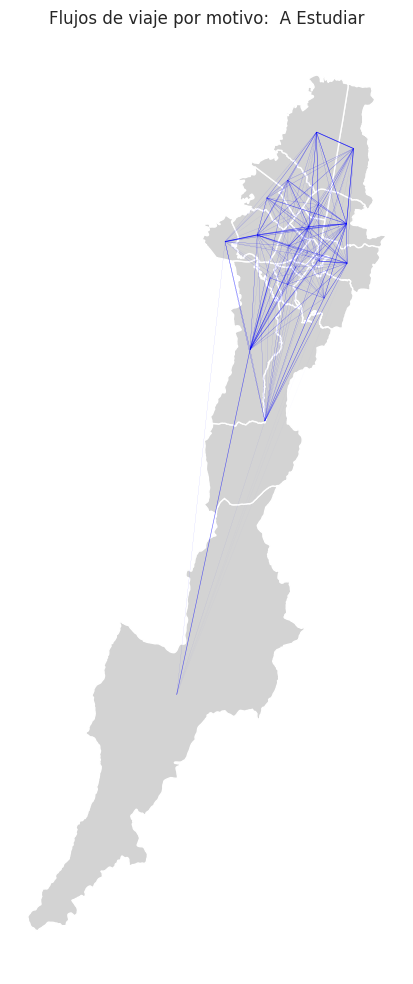

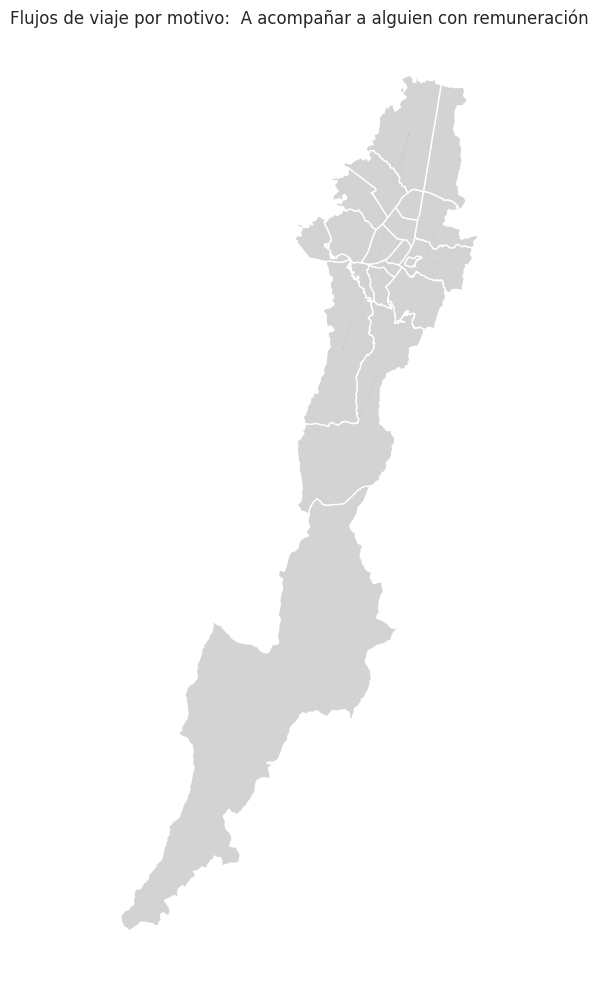

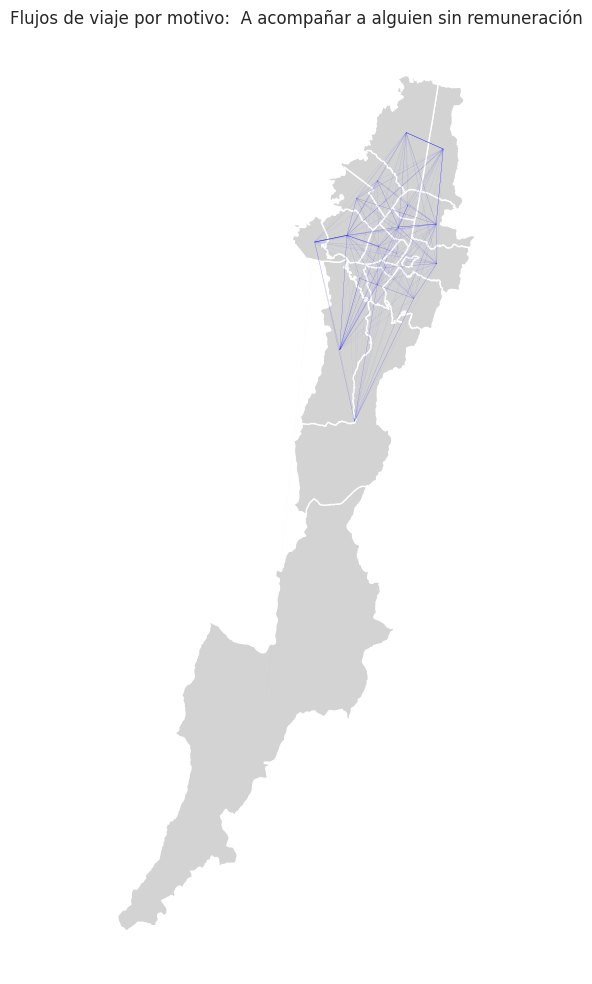

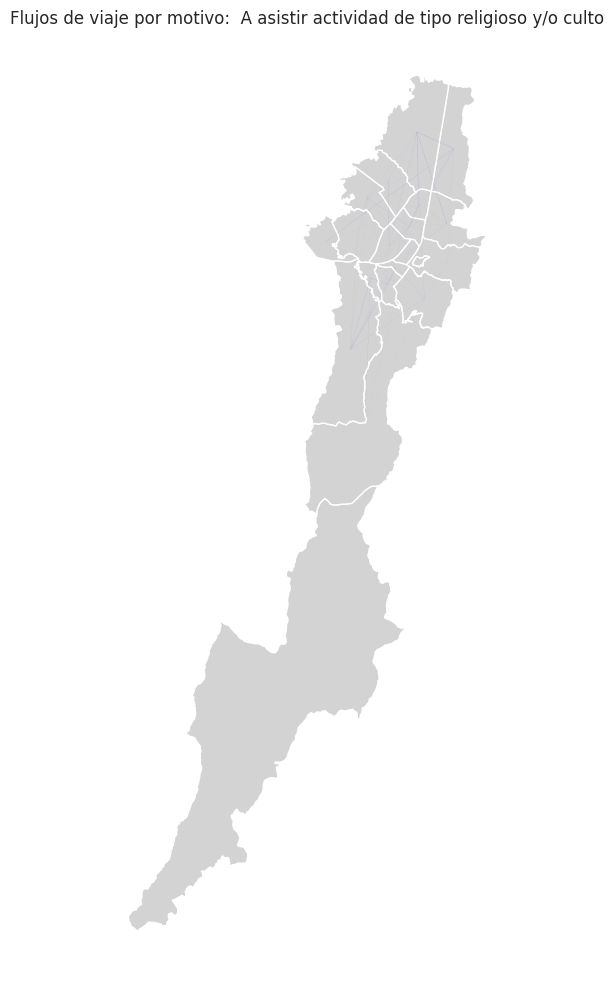

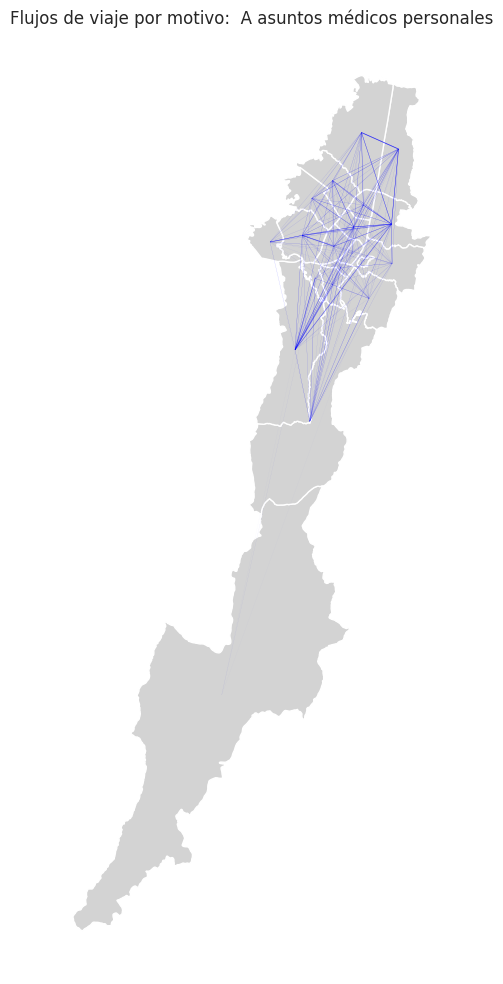

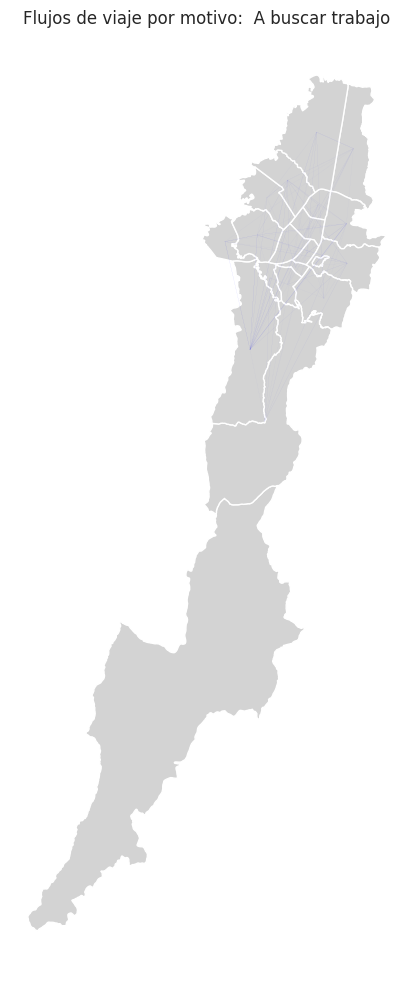

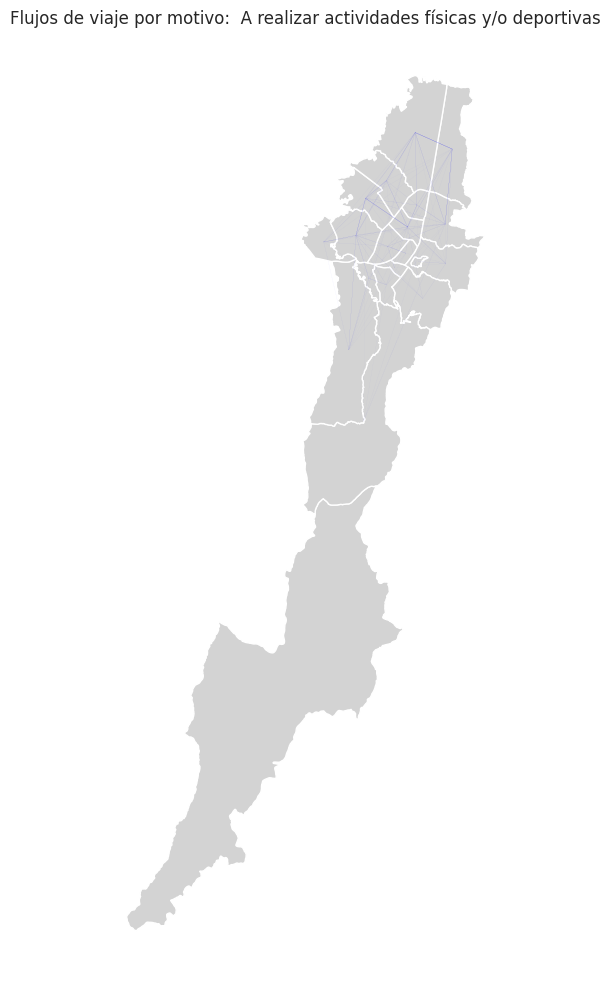

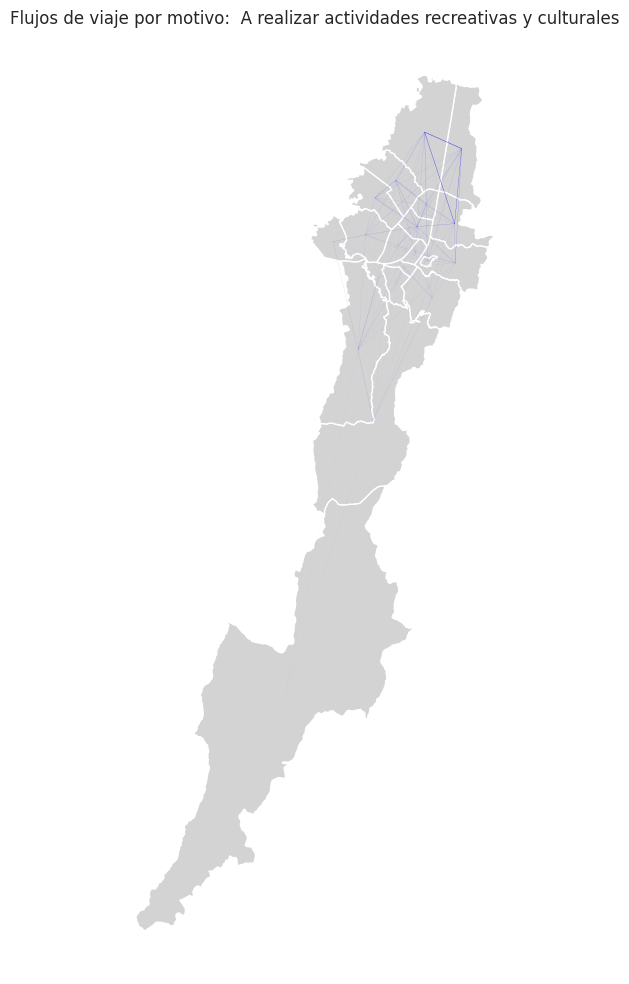

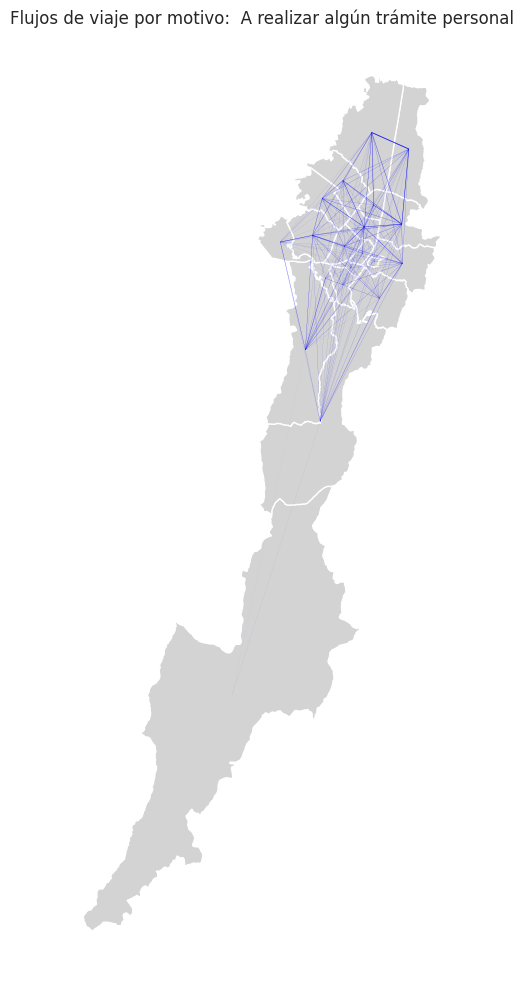

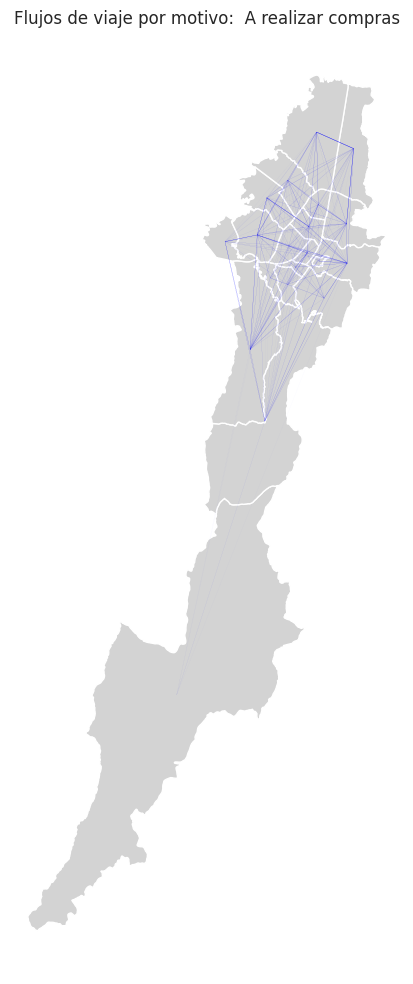

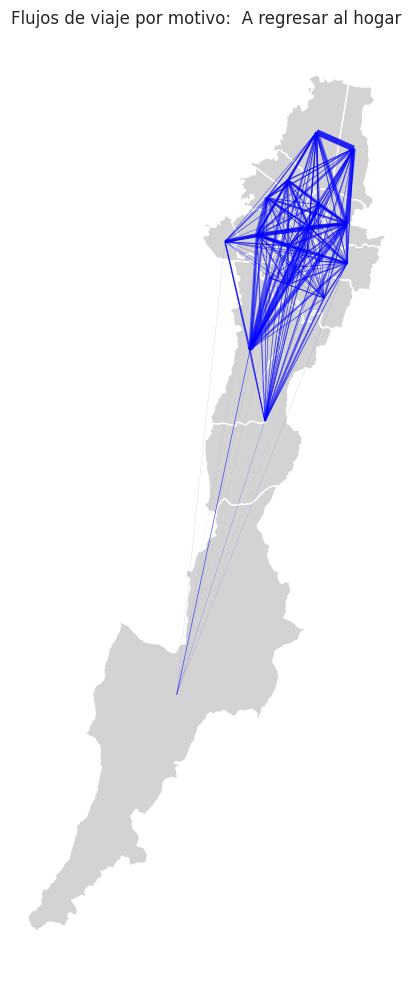

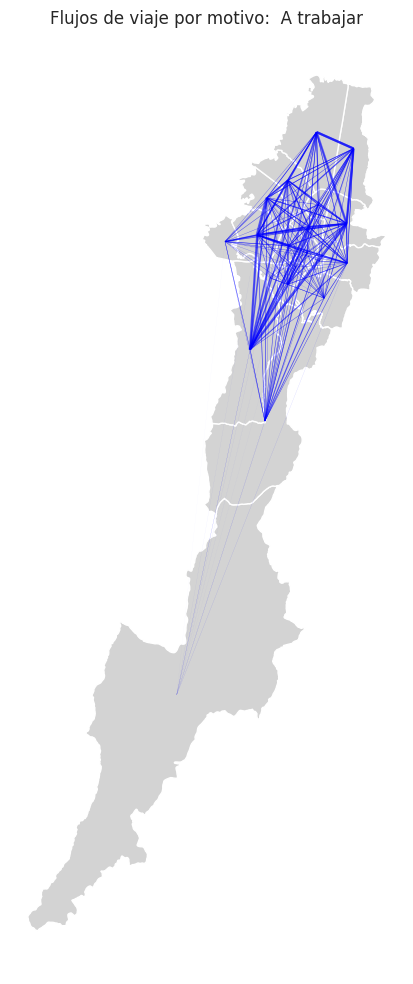

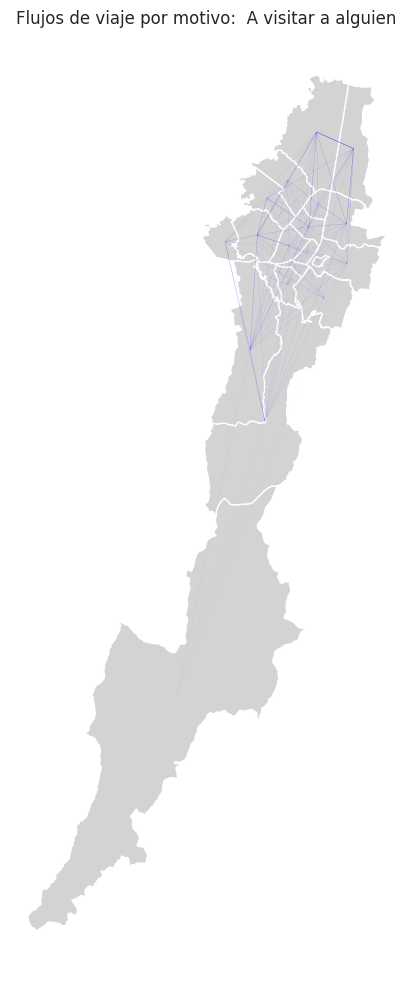

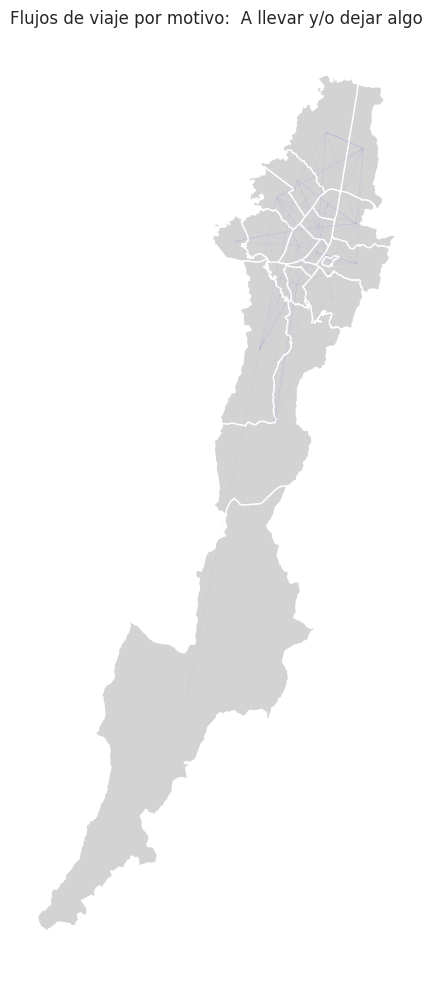

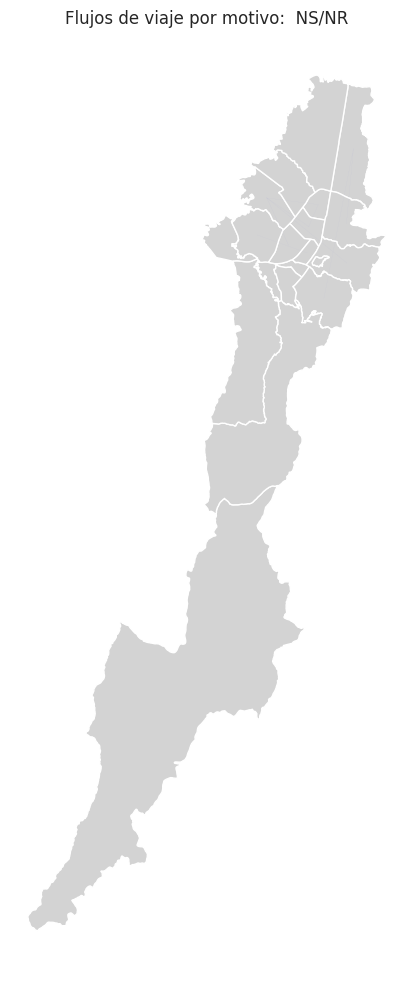

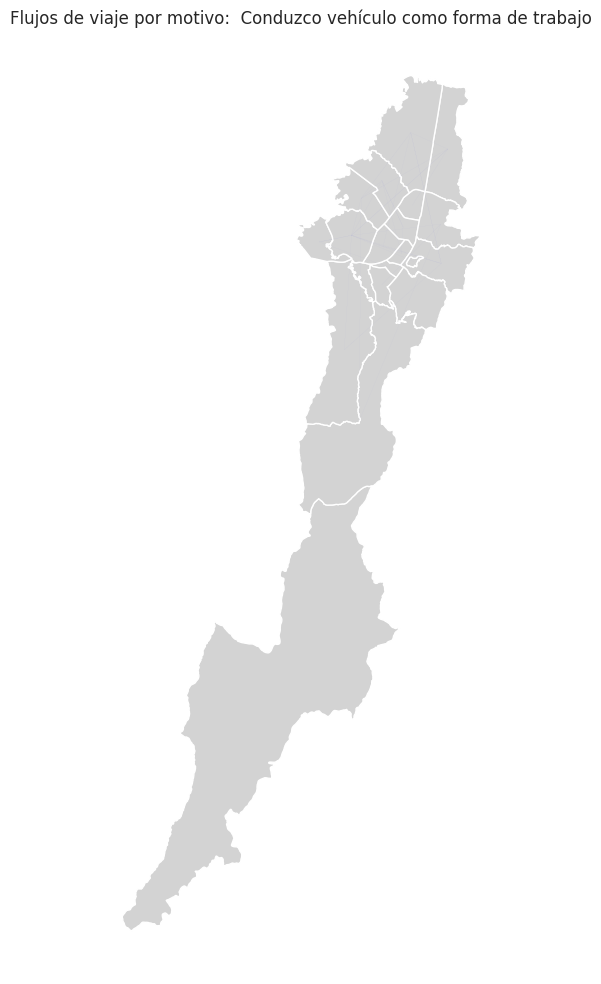

In [69]:
# Obtener lista única de motivos
motivos = gdf_flujos_motivo['motivo_viaje'].unique()

# Graficar flujos por motivo
for motivo in motivos:
    fig, ax = plt.subplots(figsize=(10, 10))
    gdf_localidades.plot(ax=ax, color='lightgrey', edgecolor='white')

    subset = gdf_flujos_motivo[gdf_flujos_motivo['motivo_viaje'] == motivo]

    subset.plot(
        ax=ax,
        linewidth=subset['Frecuencia'] / 100,  # Ajusta escala
        color='blue',
        alpha=0.6
    )

    plt.title(f'Flujos de viaje por motivo: {motivo}')
    plt.axis('off')
    plt.tight_layout()
    plt.show()

In [ ]:
colores_motivos

[' A Estudiar' ' A acompañar a alguien con remuneración'
 ' A acompañar a alguien sin remuneración'
 ' A asistir actividad de tipo religioso y/o culto'
 ' A asuntos médicos personales' ' A buscar trabajo'
 ' A realizar actividades físicas y/o deportivas'
 ' A realizar actividades recreativas y culturales'
 ' A realizar algún trámite personal' ' A realizar compras'
 ' A regresar al hogar' ' A trabajar' ' A visitar a alguien'
 ' A llevar y/o dejar algo' ' NS/NR'
 ' Conduzco vehículo como forma de trabajo']


{' A Estudiar': 'green',
 ' A acompañar a alguien con remuneración': 'red',
 ' A acompañar a alguien sin remuneración': 'orange',
 ' A asistir actividad de tipo religioso y/o culto': 'blue',
 ' A asuntos médicos personales': 'purple',
 ' A buscar trabajo': 'pink',
 ' A realizar actividades físicas y/o deportivas': 'blue',
 ' A realizar actividades recreativas y culturales': 'yellow',
 ' A realizar algún trámite personal': 'brown',
 ' A realizar compras': 'grey',
 ' A regresar al hogar': 'black'}

### interactivo 


In [70]:
import folium

# Crear mapa base centrado en Bogotá
m = folium.Map(location=[4.65, -74.1], zoom_start=11)

# Usar el GeoDataFrame correcto generado para motivos
gdf_flujos_motivo = gpd.GeoDataFrame(od_motivo, geometry='geometry', crs=gdf_localidades.crs)

colores_motivos = {od_motivo['motivo_viaje'].unique()[i]: color for i, color in enumerate(['green', 'red', 'orange', 'blue', 'purple', 'pink', 'blue', 'yellow', 'brown', 'black', 'lime', 'cyan', 'magenta']) }
# Añadir líneas
for _, row in gdf_flujos_motivo.iterrows():
    color = colores_motivos.get(row['motivo_viaje'], 'gray')
    tooltip = f"{row['localidad_ori']} → {row['localidad_des']}<br>Motivo: {row['motivo_viaje']}<br>Viajes: {row['Frecuencia']}"

    folium.PolyLine(
        locations=[(row['geometry'].coords[0][1], row['geometry'].coords[0][0]),
                   (row['geometry'].coords[1][1], row['geometry'].coords[1][0])],
        color=color,
        weight=max(row['Frecuencia'] / 100, 1),
        tooltip=tooltip,
        opacity=0.7
    ).add_to(m)

# Guardar mapa
m.save('motivos_interactivo.html')

## Duracion y Motivo

/tmp/ipykernel_1211/1640986255.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_motivo, x='motivo_viaje', y='duracion_min', palette='Set2')


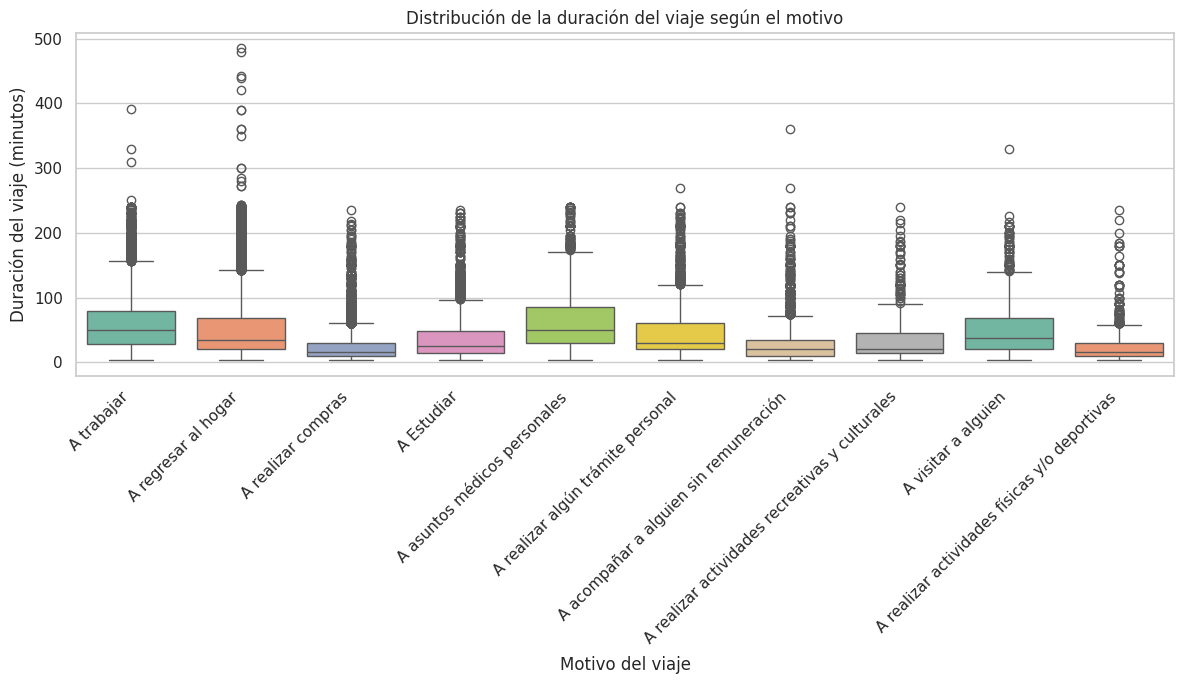

In [46]:
# Filtrar datos válidos (sin nulos en duración ni motivo)
df_motivo = df[['motivo_viaje', 'duracion_min']].dropna()

# Limitar motivos más frecuentes si son demasiados
motivos_frecuentes = df_motivo['motivo_viaje'].value_counts().head(10).index
df_motivo = df_motivo[df_motivo['motivo_viaje'].isin(motivos_frecuentes)]

# Gráfico de boxplot (puedes cambiar por violinplot si quieres)
plt.figure(figsize=(12, 7))
sns.boxplot(data=df_motivo, x='motivo_viaje', y='duracion_min', palette='Set2')

# Mejorar estilo
plt.xticks(rotation=45, ha='right')
plt.xlabel("Motivo del viaje")
plt.ylabel("Duración del viaje (minutos)")
plt.title("Distribución de la duración del viaje según el motivo")
plt.tight_layout()
plt.show()


# Frecuenica del viaje

/tmp/ipykernel_1211/1026566300.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=frecuencia_por_persona, x='Frecuencia del viaje', y='Frecuencia', palette='muted')


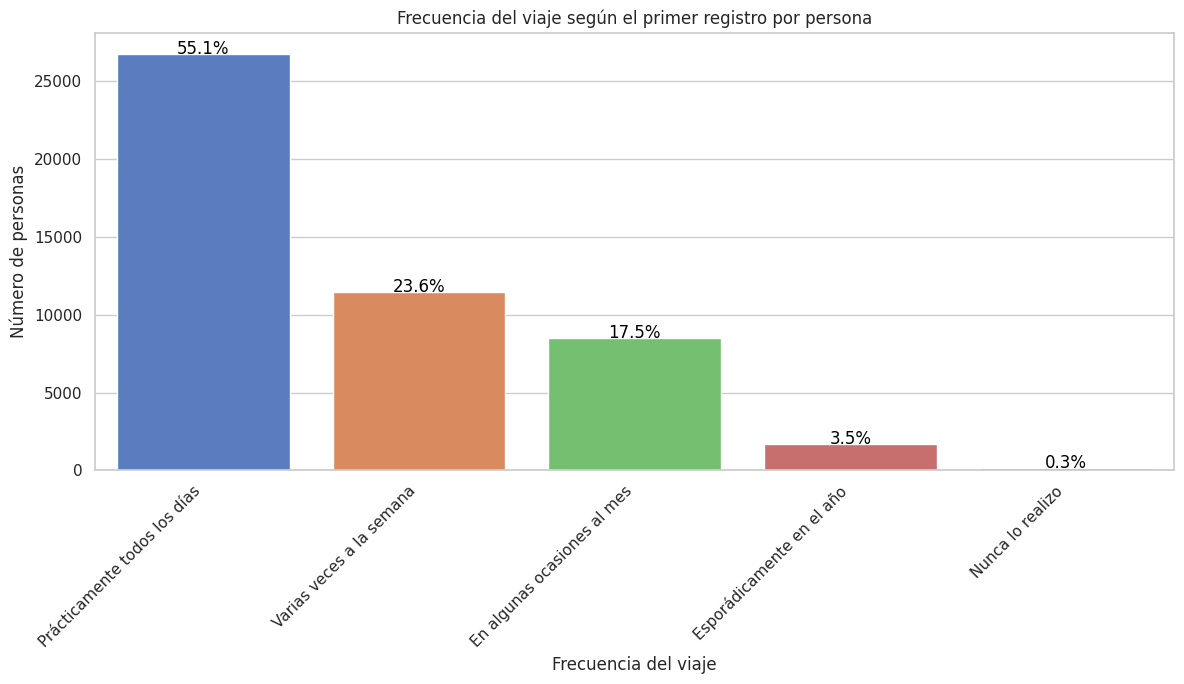

In [71]:
#  Agrupar por persona y tomar la primera frecuencia de viaje registrada
frecuencia_por_persona = df.groupby('cod_pers')['frecuencia_viaje'].first().value_counts().to_frame(name='Frecuencia')
frecuencia_por_persona['Porcentaje'] = (frecuencia_por_persona['Frecuencia'] / frecuencia_por_persona['Frecuencia'].sum()) * 100

#  Preparar para gráfico
frecuencia_por_persona = frecuencia_por_persona.reset_index()
frecuencia_por_persona.columns = ['Frecuencia del viaje', 'Frecuencia', 'Porcentaje']
frecuencia_por_persona = frecuencia_por_persona.sort_values(by='Frecuencia', ascending=False)

#  Gráfico de barras
plt.figure(figsize=(12, 7))
ax = sns.barplot(data=frecuencia_por_persona, x='Frecuencia del viaje', y='Frecuencia', palette='muted')

# Agregar etiquetas de porcentaje sobre las barras
for index, row in frecuencia_por_persona.iterrows():
    ax.text(index, row.Frecuencia + 2, f"{row.Porcentaje:.1f}%", ha='center', color='black')

# Estética del gráfico
plt.title("Frecuencia del viaje según el primer registro por persona")
plt.xlabel("Frecuencia del viaje")
plt.ylabel("Número de personas")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## En mapa

In [88]:
#En mapa
od_frecuencia = df.groupby(['localidad_ori', 'localidad_des', 'frecuencia_viaje']).agg(
    Frecuencia=('key_viaje', 'count')
).reset_index()

# Normaliza los nombres antes del merge, quitando tildes y pasando a mayúsculas
def quitar_tildes(texto):
    if pd.isnull(texto):
        return texto
    return ''.join(
        c for c in unicodedata.normalize('NFKD', str(texto))
        if not unicodedata.combining(c)
    )

od_frecuencia['localidad_ori'] = od_frecuencia['localidad_ori'].apply(quitar_tildes).str.strip().str.upper()
localidades_ori['localidad_ori'] = localidades_ori['localidad_ori'].apply(quitar_tildes).str.strip().str.upper()

od_frecuencia['localidad_des'] = od_frecuencia['localidad_des'].apply(quitar_tildes).str.strip().str.upper()
localidades_des['localidad_des'] = localidades_des['localidad_des'].apply(quitar_tildes).str.strip().str.upper()

# Repite el merge después de normalizar
od_frecuencia = od_frecuencia.merge(localidades_ori[['localidad_ori', 'geometry']], on='localidad_ori', how='left')
od_frecuencia = od_frecuencia.rename(columns={'geometry': 'geometry_ori'})

od_frecuencia = od_frecuencia.merge(localidades_des[['localidad_des', 'geometry']], on='localidad_des', how='left')
od_frecuencia = od_frecuencia.rename(columns={'geometry': 'geometry_des'})

# Ahora geometry_ori debería tener valores válidos
od_frecuencia = od_frecuencia.dropna(subset=['geometry_ori', 'geometry_des'])
od_frecuencia

localidad_ori   localidad_des              frecuencia_viaje  \
0     ANTONIO NARINO  ANTONIO NARINO   En algunas ocasiones al mes   
1     ANTONIO NARINO  ANTONIO NARINO     Esporádicamente en el año   
2     ANTONIO NARINO  ANTONIO NARINO  Prácticamente todos los días   
3     ANTONIO NARINO  ANTONIO NARINO      Varias veces a la semana   
4     ANTONIO NARINO  BARRIOS UNIDOS   En algunas ocasiones al mes   
...              ...             ...                           ...   
1757            USME         USAQUEN      Varias veces a la semana   
1758            USME            USME   En algunas ocasiones al mes   
1759            USME            USME     Esporádicamente en el año   
1760            USME            USME  Prácticamente todos los días   
1761            USME            USME      Varias veces a la semana   

      Frecuencia                                       geometry_ori  \
0            100  POLYGON ((-74.13075 4.59335, -74.12917 4.59327...   
1             24  POLYGON ((-74.13075 4.59335, -74.12917 4.59327...   
2            244  POLYGON ((-74.13075 4.59335, -74.12917 4.59327...   
3            106  POLYGON ((-74.13075 4.59335, -74.12917 4.59327...   
4              9  POLYGON ((-74.13075 4.59335, -74.12917 4.59327...   
...          ...                                                ...   
1757          29  POLYGON ((-74.05597 4.50832, -74.05611 4.50822...   
1758         256  POLYGON ((-74.05597 4.50832, -74.05611 4.50822...   
1759          27  POLYGON ((-74.05597 4.50832, -74.05611 4.50822...   
1760        1386  POLYGON ((-74.05597 4.50832, -74.05611 4.50822...   
1761         424  POLYGON ((-74.05597 4.50832, -74.05611 4.50822...   

                                           geometry_des  
0     POLYGON ((-74.13075 4.59335, -74.12917 4.59327...  
1     POLYGON ((-74.13075 4.59335, -74.12917 4.59327...  
2     POLYGON ((-74.13075 4.59335, -74.12917 4.59327...  
3     POLYGON ((-74.13075 4.59335, -74.12917 4.59327...  
4     POLYGON ((-74.05725 4.68684, -74.06249 4.65594...  
...                                                 ...  
1757  POLYGON ((-74.01116 4.66459, -74.01117 4.6646,...  
1758  POLYGON ((-74.05597 4.50832, -74.05611 4.50822...  
1759  POLYGON ((-74.05597 4.50832, -74.05611 4.50822...  
1760  POLYGON ((-74.05597 4.50832, -74.05611 4.50822...  
1761  POLYGON ((-74.05597 4.50832, -74.05611 4.50822...  

[1587 rows x 6 columns]

In [90]:
# Crear líneas de flujo
od_frecuencia['geometry'] = od_frecuencia.apply(
    lambda row: LineString([
        row['geometry_ori'].centroid.coords[0],
        row['geometry_des'].centroid.coords[0]
    ]),
    axis=1
)

# Convertir a GeoDataFrame
gdf_flujos_frecuencia = gpd.GeoDataFrame(od_frecuencia, geometry='geometry', crs=gdf_localidades.crs)
gdf_flujos_frecuencia

localidad_ori   localidad_des              frecuencia_viaje  \
0     ANTONIO NARINO  ANTONIO NARINO   En algunas ocasiones al mes   
1     ANTONIO NARINO  ANTONIO NARINO     Esporádicamente en el año   
2     ANTONIO NARINO  ANTONIO NARINO  Prácticamente todos los días   
3     ANTONIO NARINO  ANTONIO NARINO      Varias veces a la semana   
4     ANTONIO NARINO  BARRIOS UNIDOS   En algunas ocasiones al mes   
...              ...             ...                           ...   
1757            USME         USAQUEN      Varias veces a la semana   
1758            USME            USME   En algunas ocasiones al mes   
1759            USME            USME     Esporádicamente en el año   
1760            USME            USME  Prácticamente todos los días   
1761            USME            USME      Varias veces a la semana   

      Frecuencia                                       geometry_ori  \
0            100  POLYGON ((-74.13075 4.59335, -74.12917 4.59327...   
1             24  POLYGON ((-74.13075 4.59335, -74.12917 4.59327...   
2            244  POLYGON ((-74.13075 4.59335, -74.12917 4.59327...   
3            106  POLYGON ((-74.13075 4.59335, -74.12917 4.59327...   
4              9  POLYGON ((-74.13075 4.59335, -74.12917 4.59327...   
...          ...                                                ...   
1757          29  POLYGON ((-74.05597 4.50832, -74.05611 4.50822...   
1758         256  POLYGON ((-74.05597 4.50832, -74.05611 4.50822...   
1759          27  POLYGON ((-74.05597 4.50832, -74.05611 4.50822...   
1760        1386  POLYGON ((-74.05597 4.50832, -74.05611 4.50822...   
1761         424  POLYGON ((-74.05597 4.50832, -74.05611 4.50822...   

                                           geometry_des  \
0     POLYGON ((-74.13075 4.59335, -74.12917 4.59327...   
1     POLYGON ((-74.13075 4.59335, -74.12917 4.59327...   
2     POLYGON ((-74.13075 4.59335, -74.12917 4.59327...   
3     POLYGON ((-74.13075 4.59335, -74.12917 4.59327...   
4     POLYGON ((-74.05725 4.68684, -74.06249 4.65594...   
...                                                 ...   
1757  POLYGON ((-74.01116 4.66459, -74.01117 4.6646,...   
1758  POLYGON ((-74.05597 4.50832, -74.05611 4.50822...   
1759  POLYGON ((-74.05597 4.50832, -74.05611 4.50822...   
1760  POLYGON ((-74.05597 4.50832, -74.05611 4.50822...   
1761  POLYGON ((-74.05597 4.50832, -74.05611 4.50822...   

                                               geometry  
0     LINESTRING (-74.10284 4.58877, -74.10284 4.58877)  
1     LINESTRING (-74.10284 4.58877, -74.10284 4.58877)  
2     LINESTRING (-74.10284 4.58877, -74.10284 4.58877)  
3     LINESTRING (-74.10284 4.58877, -74.10284 4.58877)  
4     LINESTRING (-74.10284 4.58877, -74.07355 4.66957)  
...                                                 ...  
1757  LINESTRING (-74.14281 4.39003, -74.02788 4.74193)  
1758  LINESTRING (-74.14281 4.39003, -74.14281 4.39003)  
1759  LINESTRING (-74.14281 4.39003, -74.14281 4.39003)  
1760  LINESTRING (-74.14281 4.39003, -74.14281 4.39003)  
1761  LINESTRING (-74.14281 4.39003, -74.14281 4.39003)  

[1587 rows x 7 columns]

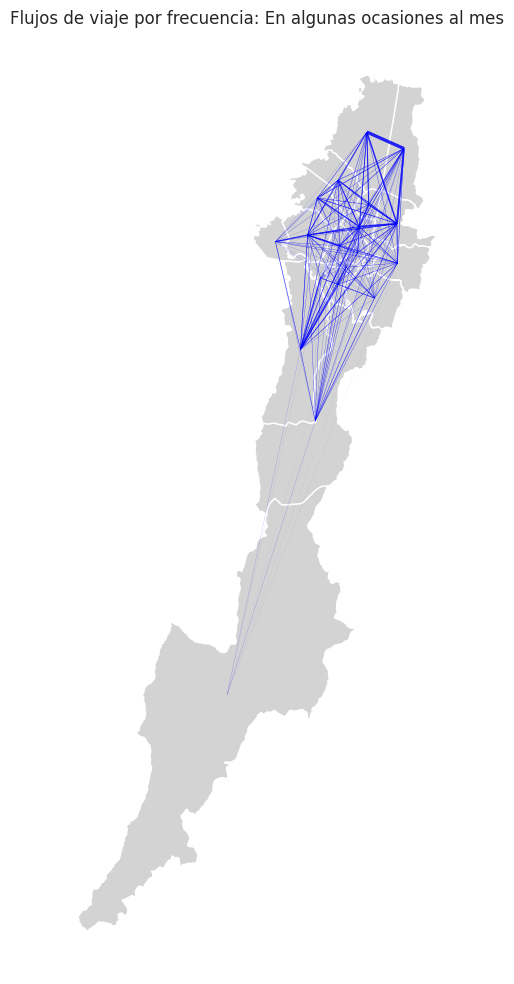

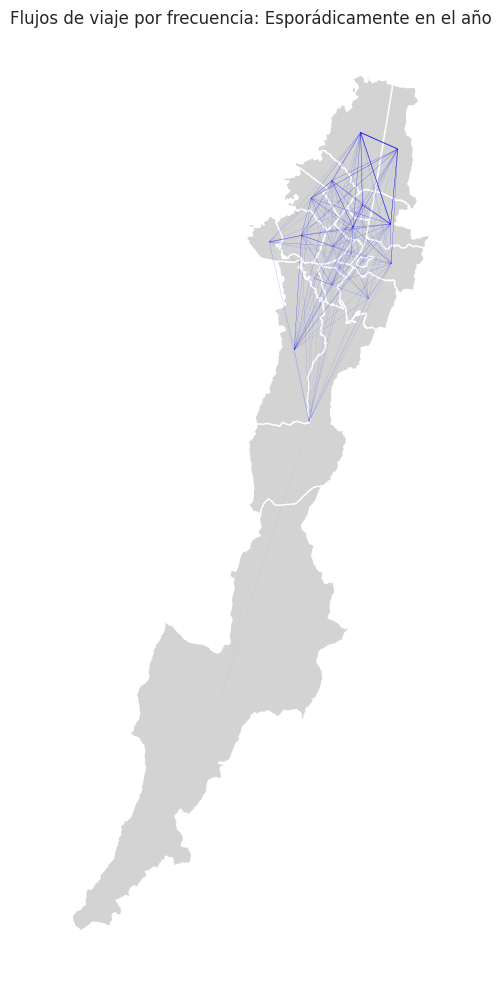

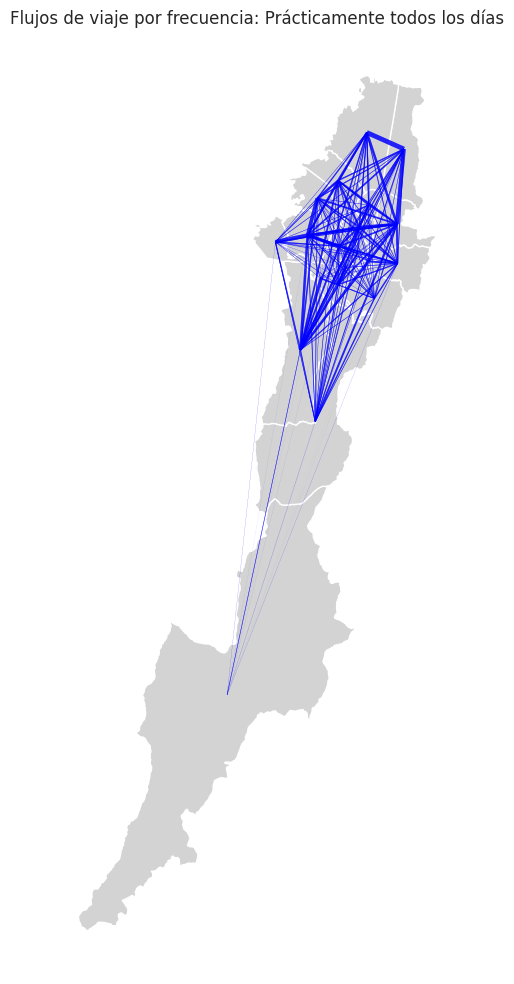

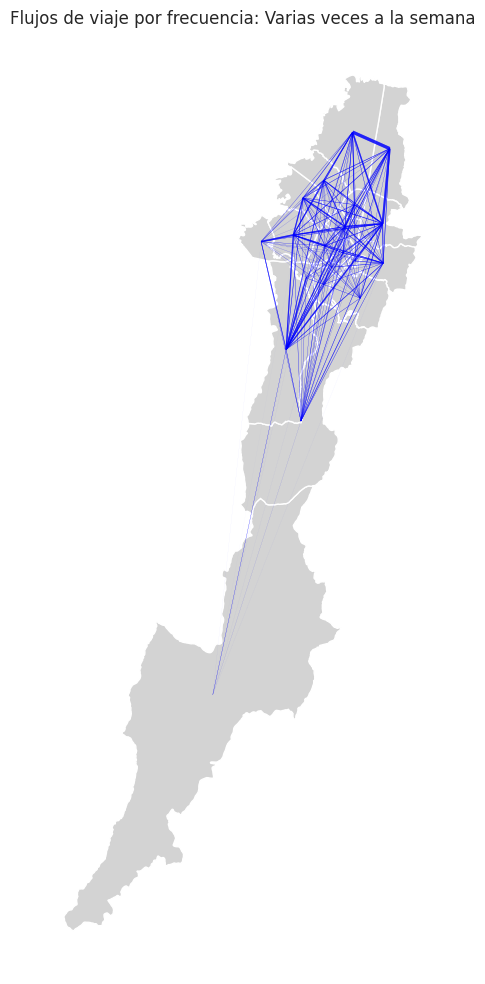

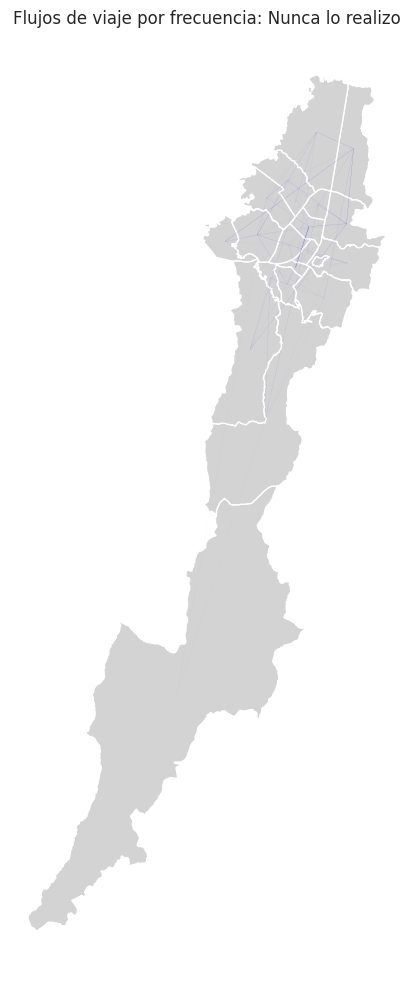

In [91]:
# Obtener lista única de frecuencias
frecuencias = gdf_flujos_frecuencia['frecuencia_viaje'].unique()

# Graficar flujos por frecuencia
for frecuencia in frecuencias:
    fig, ax = plt.subplots(figsize=(10, 10))
    gdf_localidades.plot(ax=ax, color='lightgrey', edgecolor='white')

    subset = gdf_flujos_frecuencia[gdf_flujos_frecuencia['frecuencia_viaje'] == frecuencia]

    subset.plot(
        ax=ax,
        linewidth=subset['Frecuencia'] / 100,  # Ajusta escala
        color='blue',
        alpha=0.6
    )

    plt.title(f'Flujos de viaje por frecuencia: {frecuencia}')
    plt.axis('off')
    plt.tight_layout()
    plt.show()

### Interactivo

In [93]:
# Crear mapa base centrado en Bogotá
m = folium.Map(location=[4.65, -74.1], zoom_start=11)

colores_frecuencia = {od_frecuencia['frecuencia_viaje'].unique()[i]: color for i, color in enumerate(['green', 'red', 'orange', 'blue', 'purple'])}
# Añadir líneas
for _, row in gdf_flujos_frecuencia.iterrows():
    color = colores_frecuencia.get(row['frecuencia_viaje'], 'gray')
    tooltip = f"{row['localidad_ori']} → {row['localidad_des']}<br>Frecuencia: {row['frecuencia_viaje']}<br>Viajes: {row['Frecuencia']}"

    folium.PolyLine(
        locations=[(row['geometry'].coords[0][1], row['geometry'].coords[0][0]),
                   (row['geometry'].coords[1][1], row['geometry'].coords[1][0])],
        color=color,
        weight=max(row['Frecuencia'] / 100, 1),
        tooltip=tooltip,
        opacity=0.7
    ).add_to(m)

# Guardar mapa
m.save('frecuencia_interactivo.html')


# Motivo segun grupo etario

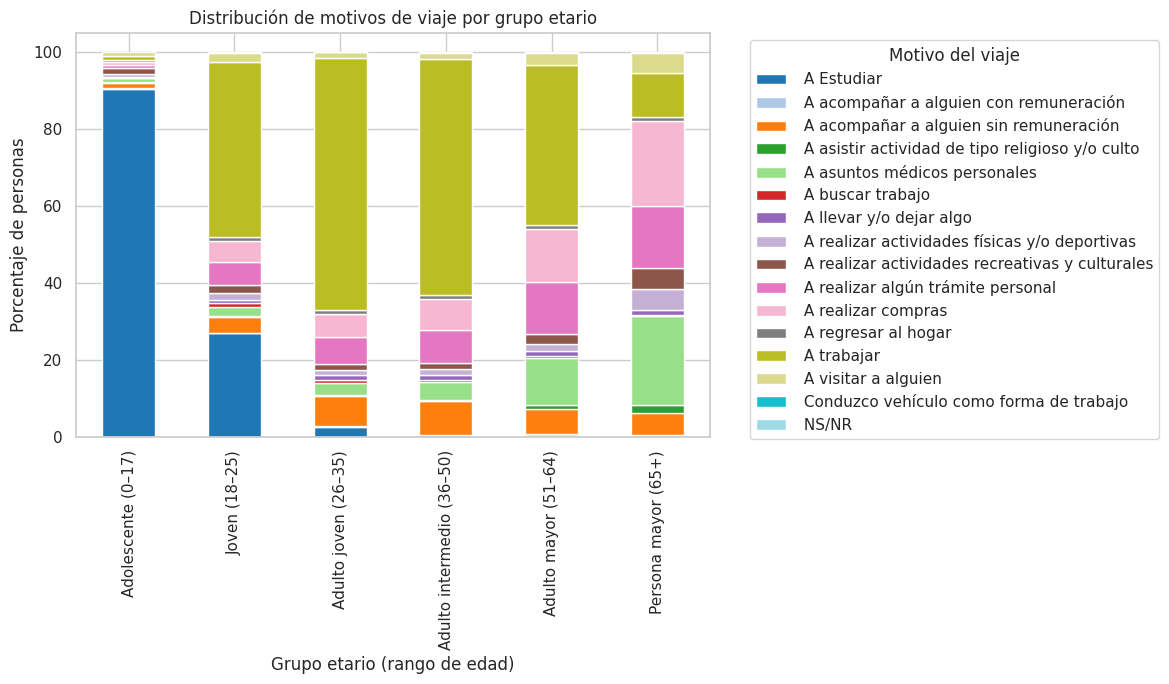

In [ ]:
# Filtrar columnas y limpiar datos
df_edad_motivo = df[['cod_pers', 'edad', 'motivo_viaje']].dropna()
edad_motivo = df_edad_motivo.groupby('cod_pers').first().reset_index()

#  Crear variable de grupo etario con rangos en las etiquetas
bins = [0, 17, 25, 35, 50, 64, 120]
labels = [
    'Adolescente (0–17)',
    'Joven (18–25)',
    'Adulto joven (26–35)',
    'Adulto intermedio (36–50)',
    'Adulto mayor (51–64)',
    'Persona mayor (65+)'
]
edad_motivo['grupo_etario'] = pd.cut(edad_motivo['edad'], bins=bins, labels=labels, right=True)

#  Tabla cruzada (grupo etario vs motivo de viaje)
tabla = pd.crosstab(edad_motivo['grupo_etario'], edad_motivo['motivo_viaje'])

#  Gráfico de barras apiladas (en porcentaje)
tabla_percent = tabla.div(tabla.sum(axis=1), axis=0) * 100

tabla_percent.plot(kind='bar', stacked=True, figsize=(12, 7), colormap='tab20')
plt.title("Distribución de motivos de viaje por grupo etario")
plt.xlabel("Grupo etario (rango de edad)")
plt.ylabel("Porcentaje de personas")
plt.legend(title="Motivo del viaje", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Motivo segun tipo de trasporte

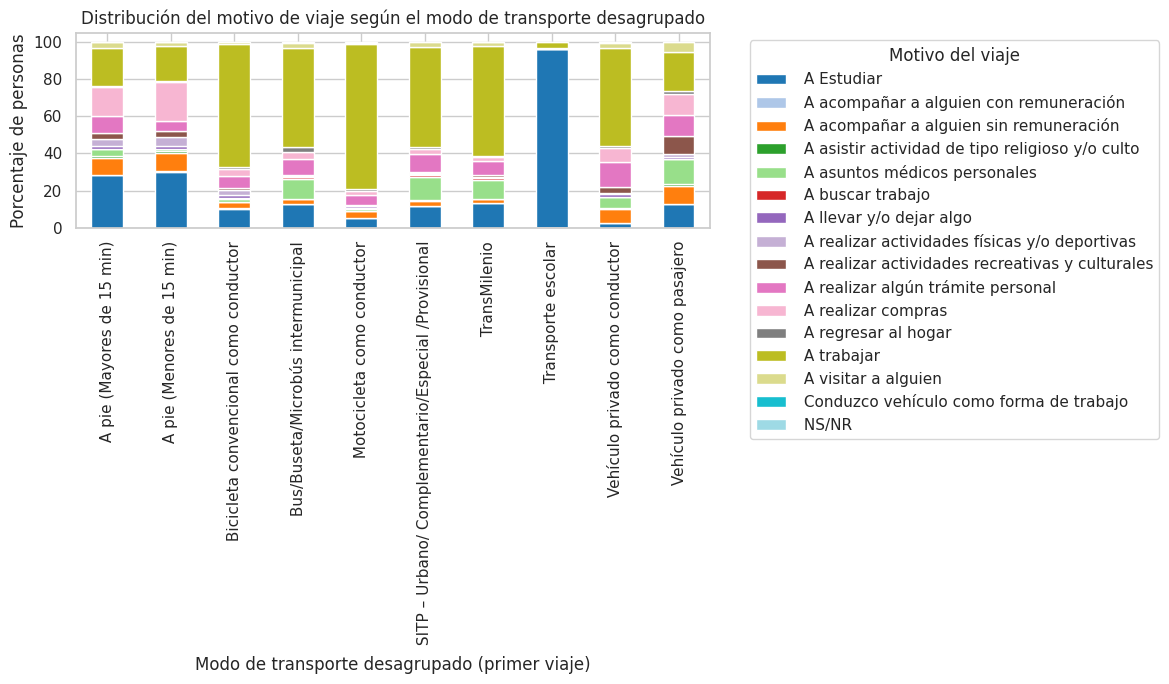

In [73]:
#  Seleccionar columnas necesarias y eliminar nulos
df_modo_motivo = df[['cod_pers', 'modo_principal_desagrupado', 'motivo_viaje']].dropna()

#  Tomar el primer registro por persona
modo_motivo = df_modo_motivo.groupby('cod_pers').first().reset_index()

#  Limitar a los 10 modos más frecuentes (opcional para claridad visual)
modos_frecuentes = modo_motivo['modo_principal_desagrupado'].value_counts().head(10).index
modo_motivo = modo_motivo[modo_motivo['modo_principal_desagrupado'].isin(modos_frecuentes)]

# Crear tabla cruzada
tabla = pd.crosstab(modo_motivo['modo_principal_desagrupado'], modo_motivo['motivo_viaje'])

#  Convertir a porcentajes por fila (por modo)
tabla_percent = tabla.div(tabla.sum(axis=1), axis=0) * 100

#  Gráfico de barras apiladas
tabla_percent.plot(kind='bar', stacked=True, figsize=(12, 7), colormap='tab20')
plt.title("Distribución del motivo de viaje según el modo de transporte desagrupado")
plt.xlabel("Modo de transporte desagrupado (primer viaje)")
plt.ylabel("Porcentaje de personas")
plt.legend(title="Motivo del viaje", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


# Duracion segun motivo

/tmp/ipykernel_1211/130521148.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=duracion_motivo, x='motivo_viaje', y='duracion_min', palette='Set2')


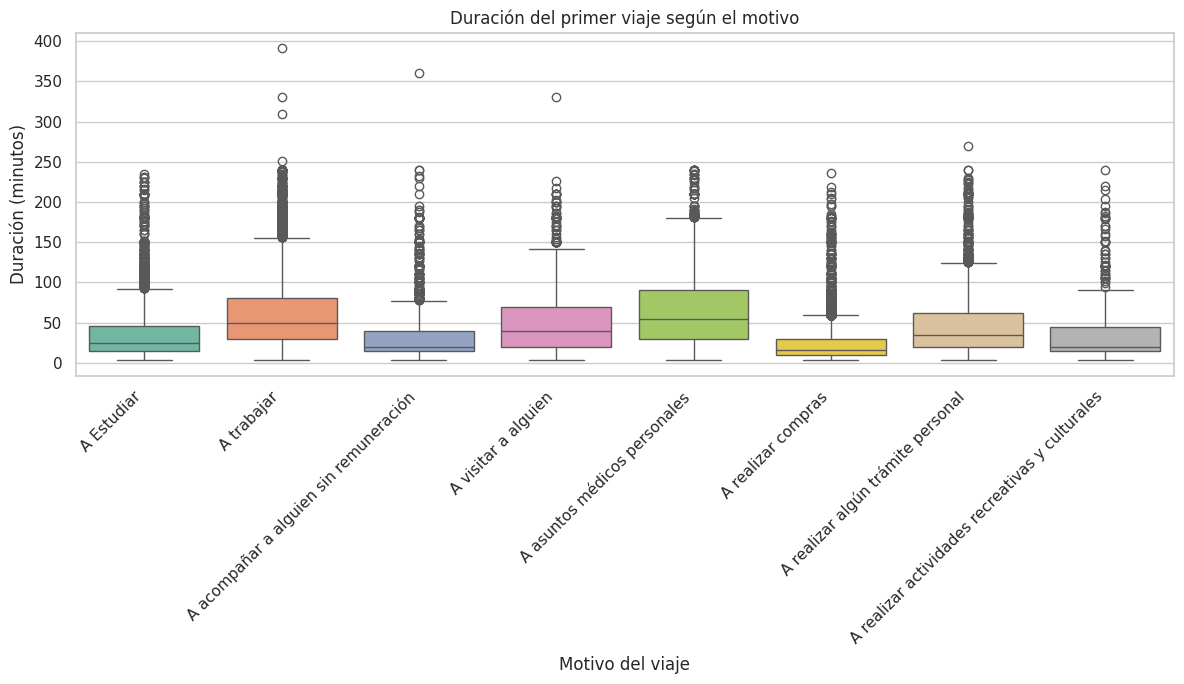

In [74]:
# Filtrar columnas necesarias y eliminar nulos
df_duracion_motivo = df[['cod_pers', 'duracion_min', 'motivo_viaje']].dropna()

# Tomar el primer viaje registrado por persona
duracion_motivo = df_duracion_motivo.groupby('cod_pers').first().reset_index()

#  (Opcional) filtrar los motivos más comunes para mayor claridad
motivos_frecuentes = duracion_motivo['motivo_viaje'].value_counts().head(8).index
duracion_motivo = duracion_motivo[duracion_motivo['motivo_viaje'].isin(motivos_frecuentes)]

# Gráfico de caja (Boxplot)
plt.figure(figsize=(12, 7))
sns.boxplot(data=duracion_motivo, x='motivo_viaje', y='duracion_min', palette='Set2')

# Estética
plt.title("Duración del primer viaje según el motivo")
plt.xlabel("Motivo del viaje")
plt.ylabel("Duración (minutos)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Tiempo de espra segun tipo de viaje

/tmp/ipykernel_1211/2141177157.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=espera_modo, x='modo_principal_desagrupado', y='t_espera_min', palette='pastel')


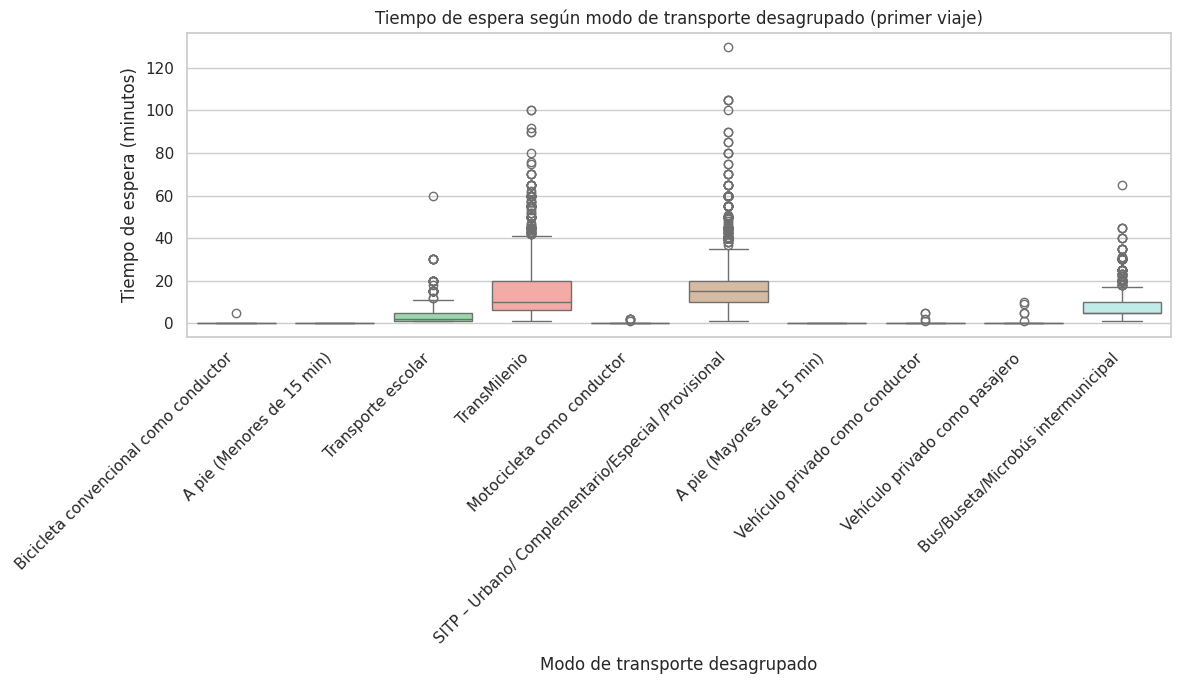

In [75]:
# Seleccionar columnas necesarias y eliminar nulos
df_espera_modo = df[['cod_pers', 't_espera_min', 'modo_principal_desagrupado']].dropna()

#  Tomar el primer viaje por persona
espera_modo = df_espera_modo.groupby('cod_pers').first().reset_index()

# (Opcional) limitar a los 10 modos más comunes para claridad
modos_frecuentes = espera_modo['modo_principal_desagrupado'].value_counts().head(10).index
espera_modo = espera_modo[espera_modo['modo_principal_desagrupado'].isin(modos_frecuentes)]

#  Boxplot
plt.figure(figsize=(12, 7))
sns.boxplot(data=espera_modo, x='modo_principal_desagrupado', y='t_espera_min', palette='pastel')

# Estética del gráfico
plt.title("Tiempo de espera según modo de transporte desagrupado (primer viaje)")
plt.xlabel("Modo de transporte desagrupado")
plt.ylabel("Tiempo de espera (minutos)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Motivo del viaje segun sexo

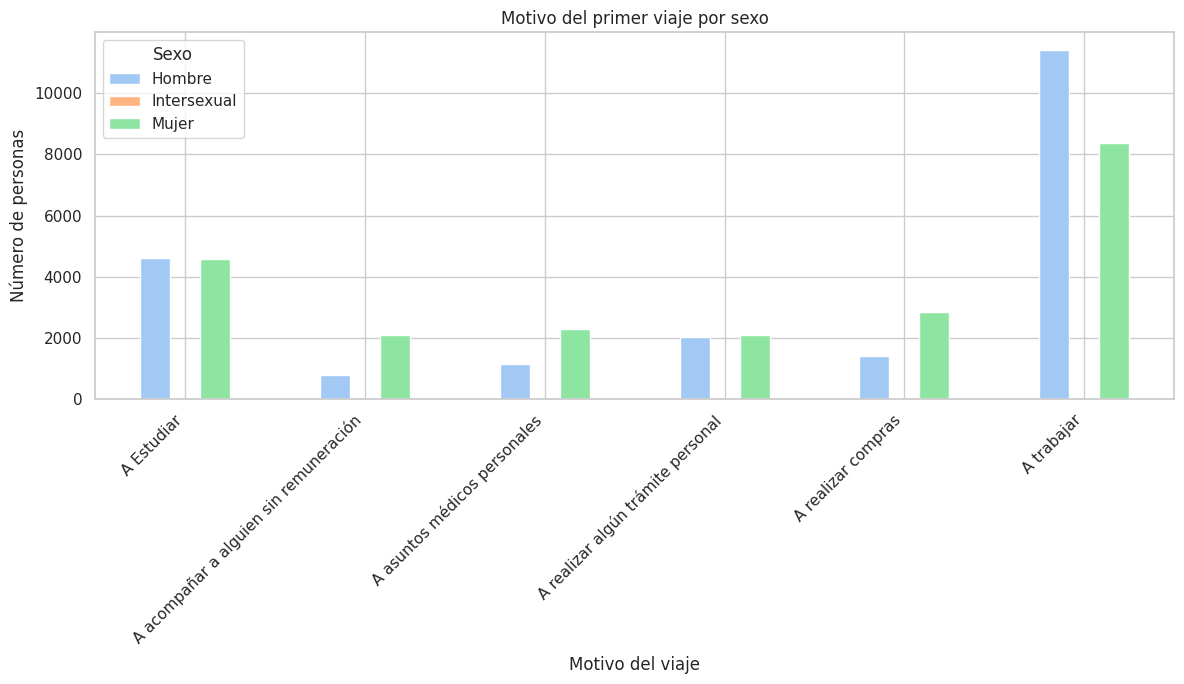

In [76]:
# Filtrar columnas necesarias y eliminar nulos
df_sexo_motivo = df[['cod_pers', 'sexo', 'motivo_viaje']].dropna()

# Tomar el primer viaje de cada persona
sexo_motivo = df_sexo_motivo.groupby('cod_pers').first().reset_index()

#  (Opcional) limitar motivos más comunes para claridad
motivos_comunes = sexo_motivo['motivo_viaje'].value_counts().head(6).index
sexo_motivo = sexo_motivo[sexo_motivo['motivo_viaje'].isin(motivos_comunes)]

#  Crear tabla cruzada
tabla = pd.crosstab(sexo_motivo['motivo_viaje'], sexo_motivo['sexo'])

# Gráfico de barras agrupadas
tabla.plot(kind='bar', figsize=(12, 7))
plt.title("Motivo del primer viaje por sexo")
plt.xlabel("Motivo del viaje")
plt.ylabel("Número de personas")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Sexo")
plt.tight_layout()
plt.show()


sexo                                    HOMBRE  MUJER
motivo_viaje                                         
A Estudiar                                4619   4582
A acompañar a alguien sin remuneración     809   2096
A asuntos médicos personales              1155   2295
A realizar algún trámite personal         2025   2104
A realizar compras                        1400   2845
A trabajar                               11417   8362


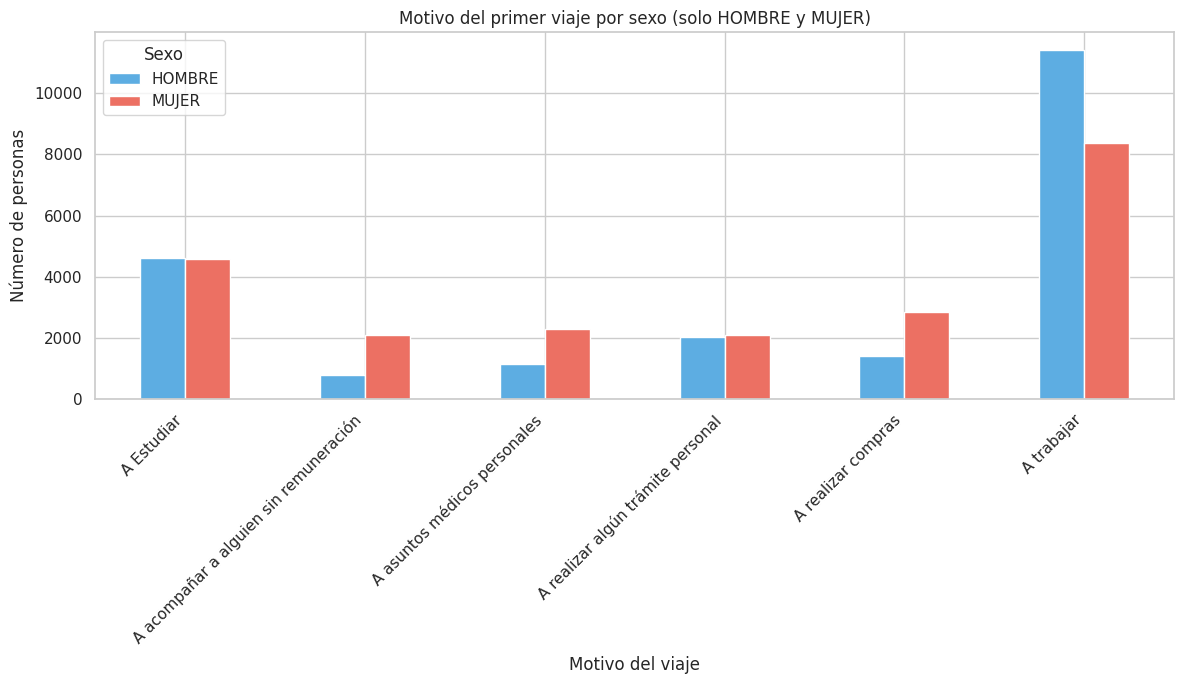

In [77]:
#  Filtrar columnas necesarias y eliminar nulos
df_sexo_motivo = df[['cod_pers', 'sexo', 'motivo_viaje']].dropna()
df['sexo'] = df['sexo'].str.upper().str.strip()  # normalizar sexo
df_sexo_motivo['sexo'] = df_sexo_motivo['sexo'].str.upper().str.strip()

#  Tomar el primer viaje de cada persona
sexo_motivo = df_sexo_motivo.groupby('cod_pers').first().reset_index()

# Filtrar solo HOMBRE y MUJER
sexo_motivo = sexo_motivo[sexo_motivo['sexo'].isin(['HOMBRE', 'MUJER'])]

#  Limitar motivos más comunes
motivos_comunes = sexo_motivo['motivo_viaje'].value_counts().head(6).index
sexo_motivo = sexo_motivo[sexo_motivo['motivo_viaje'].isin(motivos_comunes)]

# Crear tabla cruzada
tabla = pd.crosstab(sexo_motivo['motivo_viaje'], sexo_motivo['sexo'])

# Verificar que la tabla no está vacía
print(tabla)

#  Gráfico
tabla.plot(kind='bar', figsize=(12, 7), color=['#5DADE2', '#EC7063'])  # azul y rojo suave
plt.title("Motivo del primer viaje por sexo (solo HOMBRE y MUJER)")
plt.xlabel("Motivo del viaje")
plt.ylabel("Número de personas")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Sexo")
plt.tight_layout()
plt.show()





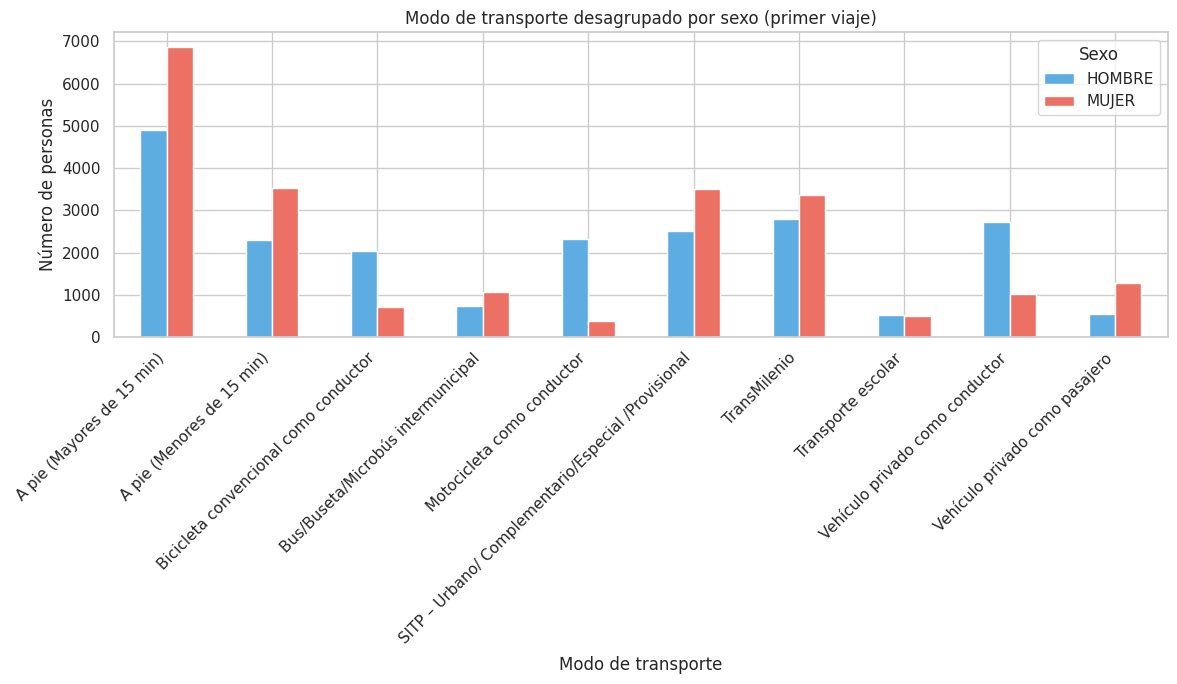

In [78]:
#  Normalizar y filtrar datos
df_sexo_modo = df[['cod_pers', 'sexo', 'modo_principal_desagrupado']].dropna()
df_sexo_modo['sexo'] = df_sexo_modo['sexo'].str.upper().str.strip()

# Tomar el primer viaje de cada persona
sexo_modo = df_sexo_modo.groupby('cod_pers').first().reset_index()

#  Filtrar solo HOMBRE y MUJER
sexo_modo = sexo_modo[sexo_modo['sexo'].isin(['HOMBRE', 'MUJER'])]

#  (Opcional) limitar a los 10 modos más comunes para claridad
modos_comunes = sexo_modo['modo_principal_desagrupado'].value_counts().head(10).index
sexo_modo = sexo_modo[sexo_modo['modo_principal_desagrupado'].isin(modos_comunes)]

#  Tabla cruzada
tabla_modo = pd.crosstab(sexo_modo['modo_principal_desagrupado'], sexo_modo['sexo'])

# Gráfico de barras agrupadas
tabla_modo.plot(kind='bar', figsize=(12, 7), color=['#5DADE2', '#EC7063'])
plt.title("Modo de transporte desagrupado por sexo (primer viaje)")
plt.xlabel("Modo de transporte")
plt.ylabel("Número de personas")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Sexo")
plt.tight_layout()
plt.show()


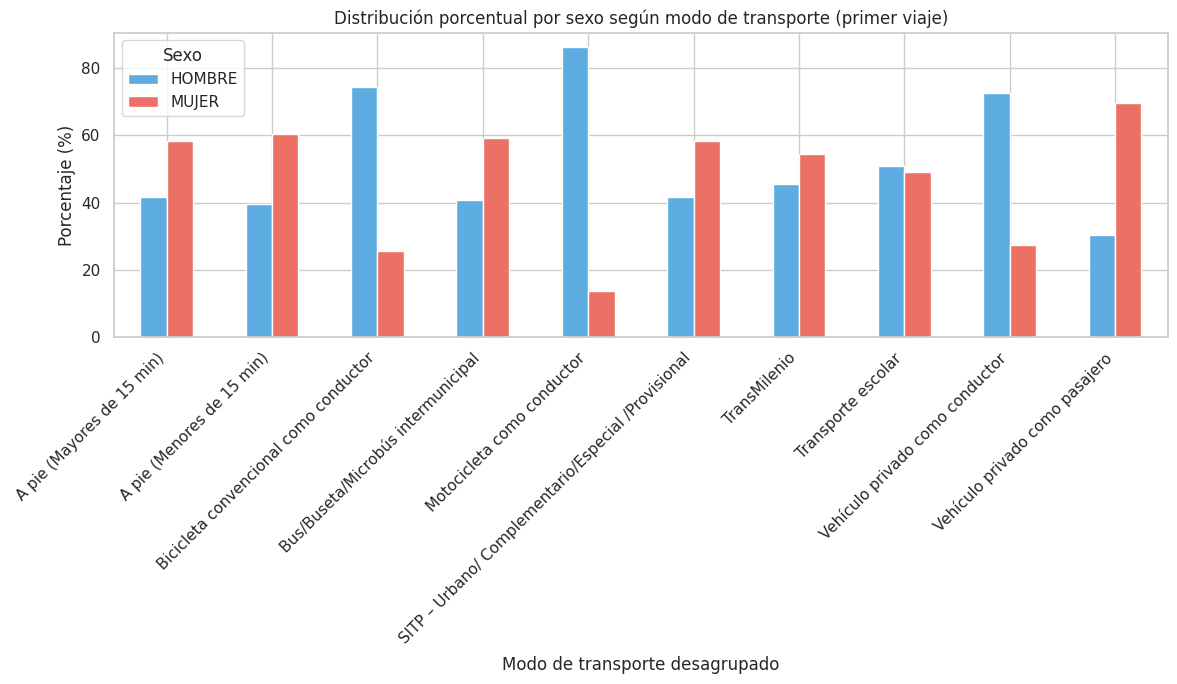

In [79]:
#  Normalizar y filtrar columnas necesarias
df_sexo_modo = df[['cod_pers', 'sexo', 'modo_principal_desagrupado']].dropna()
df_sexo_modo['sexo'] = df_sexo_modo['sexo'].str.upper().str.strip()

#  Primer viaje por persona
sexo_modo = df_sexo_modo.groupby('cod_pers').first().reset_index()

#  Filtrar solo HOMBRE y MUJER
sexo_modo = sexo_modo[sexo_modo['sexo'].isin(['HOMBRE', 'MUJER'])]

#  Limitar a los 10 modos más frecuentes
modos_comunes = sexo_modo['modo_principal_desagrupado'].value_counts().head(10).index
sexo_modo = sexo_modo[sexo_modo['modo_principal_desagrupado'].isin(modos_comunes)]

#  Crear tabla cruzada y convertir a porcentaje por fila
tabla = pd.crosstab(sexo_modo['modo_principal_desagrupado'], sexo_modo['sexo'])
tabla_pct = tabla.div(tabla.sum(axis=1), axis=0) * 100

#  Gráfico de barras agrupadas por porcentaje
tabla_pct.plot(kind='bar', figsize=(12, 7), color=['#5DADE2', '#EC7063'])
plt.title("Distribución porcentual por sexo según modo de transporte (primer viaje)")
plt.xlabel("Modo de transporte desagrupado")
plt.ylabel("Porcentaje (%)")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Sexo")
plt.tight_layout()
plt.show()


# OCupacion se4gun modo de trasporte

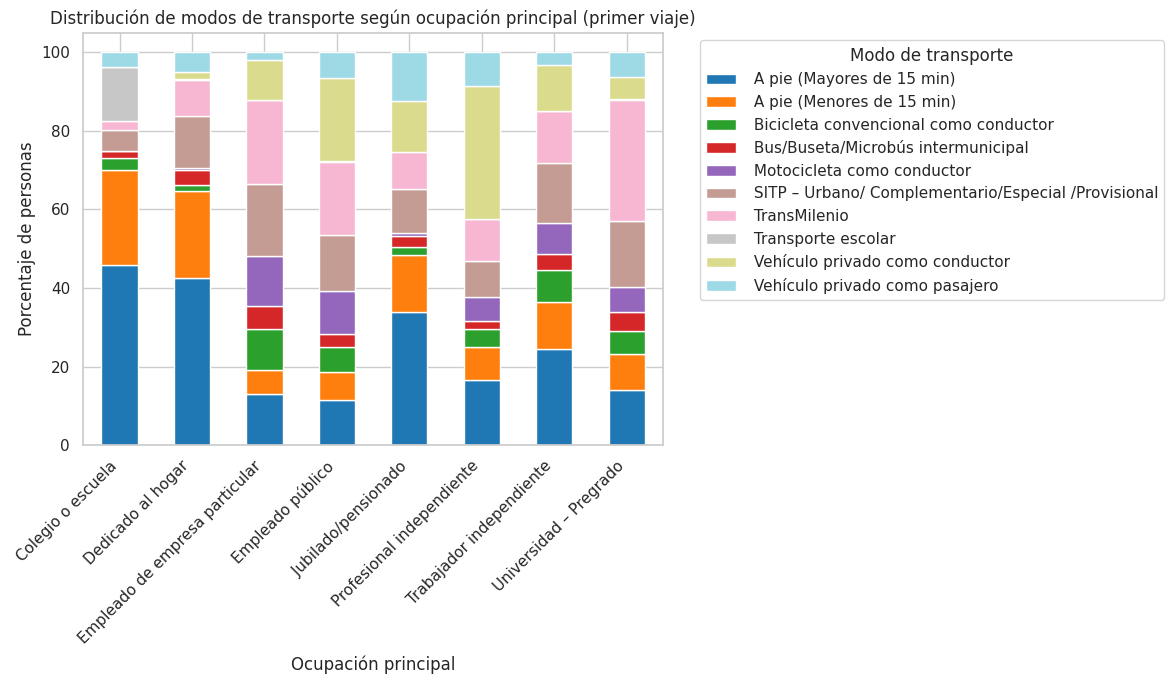

In [80]:
#  Seleccionar columnas y limpiar
df_ocup_modo = df[['cod_pers', 'ocupacion_principal', 'modo_principal_desagrupado']].dropna()

# Tomar el primer registro por persona
ocup_modo = df_ocup_modo.groupby('cod_pers').first().reset_index()

#  Limitar a las 8 ocupaciones y 10 modos más comunes
ocupaciones_top = ocup_modo['ocupacion_principal'].value_counts().head(8).index
modos_top = ocup_modo['modo_principal_desagrupado'].value_counts().head(10).index
ocup_modo = ocup_modo[
    ocup_modo['ocupacion_principal'].isin(ocupaciones_top) &
    ocup_modo['modo_principal_desagrupado'].isin(modos_top)
]

#  Tabla cruzada
tabla = pd.crosstab(ocup_modo['ocupacion_principal'], ocup_modo['modo_principal_desagrupado'])

#  Convertir a porcentaje por fila
tabla_pct = tabla.div(tabla.sum(axis=1), axis=0) * 100

# Gráfico de barras apiladas en porcentaje
tabla_pct.plot(kind='bar', stacked=True, figsize=(12, 7), colormap='tab20')
plt.title("Distribución de modos de transporte según ocupación principal (primer viaje)")
plt.xlabel("Ocupación principal")
plt.ylabel("Porcentaje de personas")
plt.legend(title="Modo de transporte", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Duracion del viaje

In [81]:
#  Seleccionar columnas y eliminar nulos
df_od_dur = df[['localidad_ori', 'localidad_des', 'duracion_min']].dropna()

#  Crear matriz OD con promedio de duración
matriz_duracion = df_od_dur.pivot_table(
    index='localidad_ori',
    columns='localidad_des',
    values='duracion_min',
    aggfunc='mean'  # puedes usar 'median' si prefieres
)

#  Visualizar la matriz como tabla (truncada)
matriz_duracion.head(10)


localidad_des   Antonio Nariño  Barrios Unidos       Bosa  Candelaria  \
localidad_ori                                                           
Antonio Nariño       22.753165       65.240000  69.640000   41.526316   
Barrios Unidos       62.230769       25.604010  78.767442   54.363636   
Bosa                 59.600000       74.239130  28.518270   80.500000   
Candelaria           38.444444       68.523810  74.300000   17.603687   
Chapinero            63.422535       45.413793  77.766355   50.351351   
Ciudad Bolivar       67.156627       69.457364  50.910256   75.549020   
Engativa             71.520000       53.963542  61.767442   71.275862   
Fontibon             76.500000       65.735632  77.597222   49.971429   
Kennedy              60.755102       76.437956  39.442149   68.400000   
Los Martires         35.971014       54.745098  84.724138   40.534884   

localidad_des   Chapinero  Ciudad Bolivar   Engativa   Fontibon    Kennedy  \
localidad_ori                                                                
Antonio Nariño  59.464789       71.532164  71.521739  78.035714  68.103093   
Barrios Unidos  46.460208       72.774194  50.373684  61.185185  79.569343   
Bosa            79.437500       52.816456  64.837500  89.098361  41.422680   
Candelaria      51.676471       78.816327  73.290323  61.580645  72.927536   
Chapinero       35.126753       90.945289  62.842553  70.633166  90.105960   
Ciudad Bolivar  86.687307       31.580637  83.189744  88.178808  69.896875   
Engativa        62.334694       85.741935  27.950938  49.957983  67.413043   
Fontibon        66.044053       91.528662  52.481343  34.504650  58.164141   
Kennedy         82.800654       72.200669  62.825532  52.007634  30.048531   
Los Martires    64.715517       83.778571  67.048387  57.461538  65.744681   

localidad_des   Los Martires  ...  Puente Aranda  Rafael Uribe Uribe  \
localidad_ori                 ...                                      
Antonio Nariño     40.824324  ...      46.483516           43.302198   
Barrios Unidos     50.340000  ...      51.270000           79.567568   
Bosa               79.925926  ...      59.128788           61.921569   
Candelaria         34.184211  ...      65.375000           53.000000   
Chapinero          58.210084  ...      67.161290           69.335443   
Ciudad Bolivar     73.289655  ...      65.897959           65.056122   
Engativa           61.862069  ...      62.921053           84.180328   
Fontibon           58.178571  ...      62.449275           89.519231   
Kennedy            60.238095  ...      51.047733           77.430894   
Los Martires       33.631148  ...      44.234375           57.139344   

localidad_des   San Cristóbal   Santa Fe        Suba     Sumapaz  Teusaquillo  \
localidad_ori                                                                   
Antonio Nariño      44.689320  45.580000   68.857143    5.000000    53.355932   
Barrios Unidos      88.965517  64.338710   44.309179         NaN    38.271062   
Bosa                76.136364  77.768116   87.108696   42.500000    78.691176   
Candelaria          54.880952  26.268571   45.866667         NaN    52.208333   
Chapinero           70.150376  54.288538   59.614428  135.000000    51.657143   
Ciudad Bolivar      71.712121  77.593333  104.881944   50.830508    84.179775   
Engativa            86.961538  68.875000   57.094118    5.000000    47.918440   
Fontibon            77.133333  63.014925   67.726708         NaN    43.960714   
Kennedy             63.196078  69.185792   81.173684   20.000000    67.817121   
Los Martires        56.356322  42.104478   67.093750   24.000000    48.456897   

localidad_des   Tunjuelito     Usaquen        Usme  
localidad_ori                                       
Antonio Nariño   47.861111   96.736842   84.338028  
Barrios Unidos   77.379310   58.428571   83.406250  
Bosa             52.384615   87.281250   55.205479  
Candelaria       71.000000   75.034483   79.108108  
Chapinero        91.291667   5

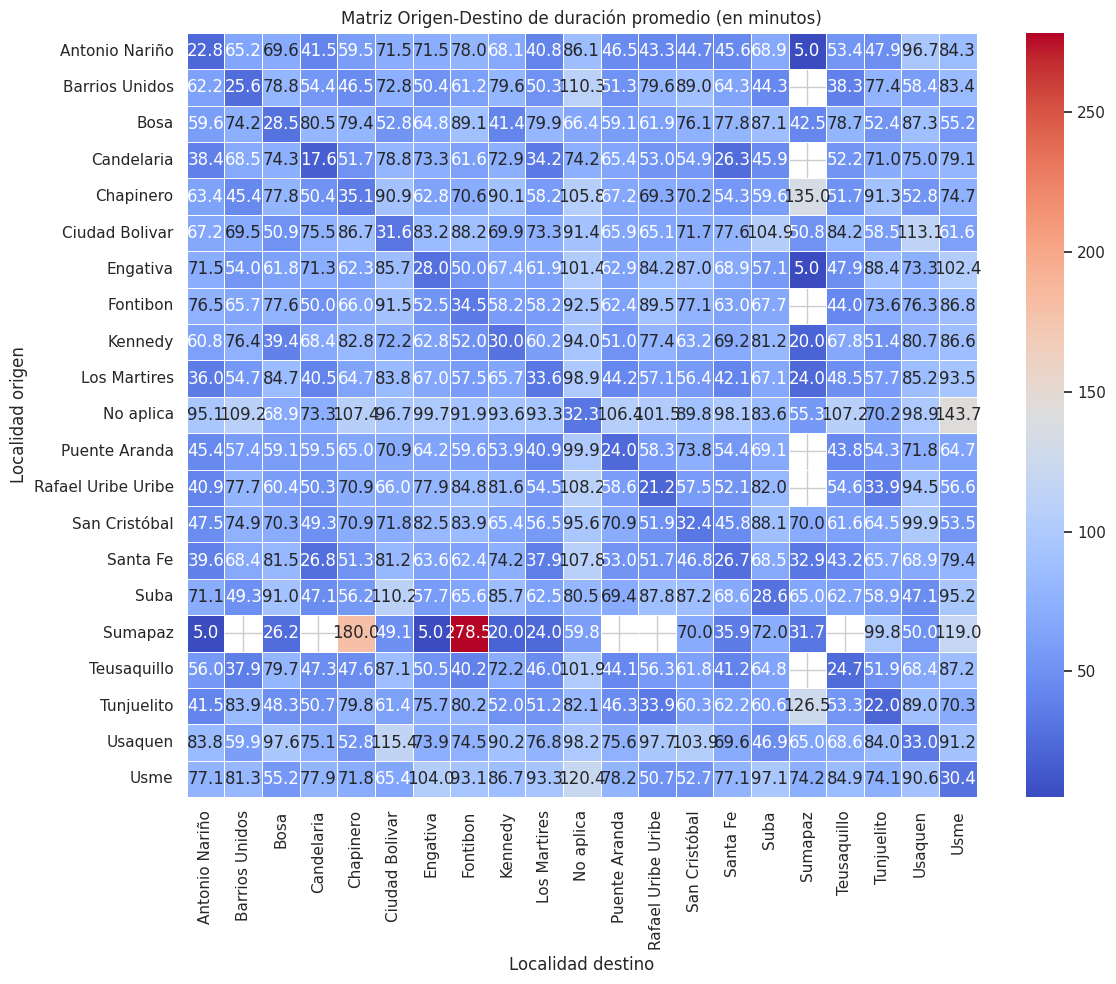

In [82]:
plt.figure(figsize=(12, 10))
sns.heatmap(matriz_duracion, annot=True, fmt=".1f", cmap="coolwarm", linewidths=0.5)
plt.title("Matriz Origen-Destino de duración promedio (en minutos)")
plt.xlabel("Localidad destino")
plt.ylabel("Localidad origen")
plt.tight_layout()
plt.show()


# En mapa 

/tmp/ipykernel_1211/1696482565.py:12: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroides = gdf_localidades.set_index('localidad').centroid
/tmp/ipykernel_1211/1696482565.py:32: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('plasma')


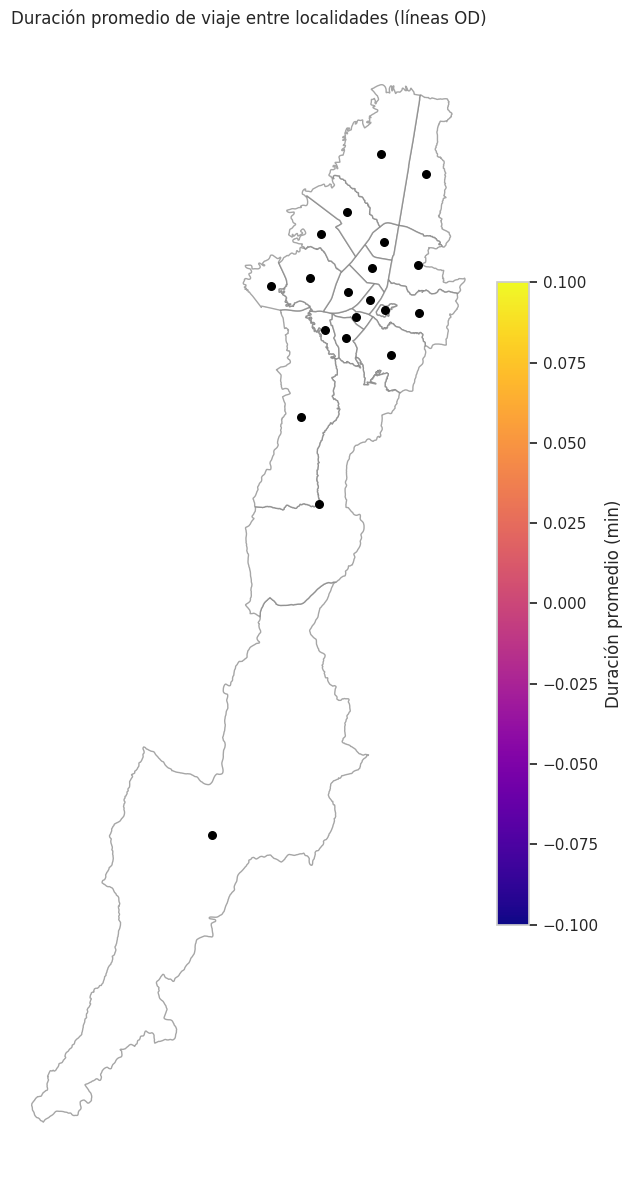

In [94]:
import geopandas as gpd
from shapely.geometry import LineString

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.cm as cm

# Usar la matriz_duracion ya calculada (de la celda 52)
# Usar gdf_localidades ya cargado (de la celda 4)

# Obtener centroides de cada localidad
centroides = gdf_localidades.set_index('localidad').centroid

# Crear lista de líneas OD con duración promedio
lines = []
duraciones = []

for ori in matriz_duracion.index:
    for des in matriz_duracion.columns:
        if ori != des and not pd.isna(matriz_duracion.loc[ori, des]):
            punto_ori = centroides.get(ori)
            punto_des = centroides.get(des)
            if punto_ori is not None and punto_des is not None:
                lines.append(LineString([punto_ori, punto_des]))
                duraciones.append(matriz_duracion.loc[ori, des])

# Crear GeoDataFrame de líneas
gdf_lines = gpd.GeoDataFrame({'duracion': duraciones, 'geometry': lines}, crs=gdf_localidades.crs)

# Normalizar duración para color y grosor
norm = mcolors.Normalize(vmin=gdf_lines['duracion'].min(), vmax=gdf_lines['duracion'].max())
cmap = cm.get_cmap('plasma')

# Plot
fig, ax = plt.subplots(figsize=(12, 12))
gdf_localidades.plot(ax=ax, color='white', edgecolor='gray', alpha=0.7)

for _, row in gdf_lines.iterrows():
    color = cmap(norm(row['duracion']))
    linewidth = 1 + 5 * norm(row['duracion'])  # grosor proporcional
    ax.plot(*row['geometry'].xy, color=color, linewidth=linewidth, alpha=0.8)

# Añadir centroides
centroides_gdf = gpd.GeoDataFrame(geometry=centroides)
centroides_gdf.plot(ax=ax, color='black', markersize=30, zorder=3)

# Colorbar
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, fraction=0.03, pad=0.01)
cbar.set_label('Duración promedio (min)')

plt.title('Duración promedio de viaje entre localidades (líneas OD)')
plt.axis('off')
plt.tight_layout()
plt.show()

In [83]:
# Cargar solo una muestra del archivo con las columnas necesarias
df = pd.read_excel("/content/d. Modulo viajes.xlsx",
                   sheet_name="VIAJES",
                   usecols=["localidad_ori", "localidad_des", "duracion_min"],
                   nrows=50000)  # puedes ajustar si lo permite tu memoria

# Limpiar texto y eliminar nulos
df = df.dropna()
df['localidad_ori'] = df['localidad_ori'].str.strip().str.upper()
df['localidad_des'] = df['localidad_des'].str.strip().str.upper()

# Matriz OD de duración promedio
matriz = df.pivot_table(index='localidad_ori', columns='localidad_des',
                        values='duracion_min', aggfunc='mean')

# Limitar a top 10 localidades por frecuencia para simplificar gráfico
top_localidades = df['localidad_ori'].value_counts().head(10).index
matriz = matriz.loc[top_localidades, top_localidades].fillna(0)

# Preparar datos para Sankey (simulación de cuerdas)
import plotly.graph_objects as go

labels = list(top_localidades)
source = []
target = []
value = []

for i, ori in enumerate(labels):
    for j, des in enumerate(labels):
        if ori != des and matriz.loc[ori, des] > 0:
            source.append(i)
            target.append(j)
            value.append(matriz.loc[ori, des])

fig = go.Figure(data=[go.Sankey(
    node=dict(label=labels, pad=15, thickness=20),
    link=dict(source=source, target=target, value=value)
)])

fig.update_layout(title_text="Gráfico de cuerdas: duración promedio de viaje entre localidades", font_size=10)
fig.show()


FileNotFoundError: [Errno 2] No such file or directory: '/content/d. Modulo viajes.xlsx'

In [ ]:
import pandas as pd
import plotly.graph_objects as go

# Cargar el archivo y filtrar columnas
df = pd.read_excel("d. Modulo viajes.xlsx", sheet_name="VIAJES",
                   usecols=["localidad_ori", "localidad_des", "duracion_min"],
                   nrows=50000)  # ajusta si tu máquina lo permite

# Limpiar texto y eliminar nulos
df = df.dropna()
df['localidad_ori'] = df['localidad_ori'].str.strip().str.upper()
df['localidad_des'] = df['localidad_des'].str.strip().str.upper()

# Excluir registros 'NO APLICA'
df = df[(df['localidad_ori'] != 'NO APLICA') & (df['localidad_des'] != 'NO APLICA')]

# Crear matriz OD de duración promedio
matriz = df.pivot_table(index='localidad_ori', columns='localidad_des',
                        values='duracion_min', aggfunc='mean')

# Seleccionar top 10 localidades con más registros como origen
top_localidades = df['localidad_ori'].value_counts().head(10).index
matriz = matriz.loc[top_localidades, top_localidades].fillna(0)

# Construcción de datos para Sankey
labels = list(top_localidades)
source = []
target = []
value = []

for i, ori in enumerate(labels):
    for j, des in enumerate(labels):
        if ori != des and matriz.loc[ori, des] > 0:
            source.append(i)
            target.append(j)
            value.append(matriz.loc[ori, des])

# Gráfico Sankey (tipo cuerdas)
fig = go.Figure(data=[go.Sankey(
    node=dict(label=labels, pad=15, thickness=20),
    link=dict(source=source, target=target, value=value)
)])

fig.update_layout(title_text="Gráfico de cuerdas: duración promedio entre localidades (sin 'NO APLICA')", font_size=10)
fig.show()
